In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import glob

from utils import import_file, AnalyzeResample, plot_examples, ts_stats

## Importación de Datos

In [12]:
PATTERN = "../non_disturbed/*.csv"
files = glob.glob(PATTERN)

Número de TSs: 100
Largo Promedio por TS: 1404.0
Promedio de Nulos por TS: 465.29


date      ndvi ts_id  ndvi_null
652 2000-01-03  0.553049  0024      False
208 2000-01-11  0.615087  0024      False
209 2000-01-27  0.599064  0024      False
653 2000-02-20  0.596084  0024      False
210 2000-02-28  0.673921  0024      False

In [14]:
## Chequeo de que las Series de Tiempo no son Equidistantes...
ts_df.date.diff()

652       NaT
208    8 days
209   16 days
653   24 days
210    8 days
        ...  
709    1 days
7      7 days
908    1 days
188    7 days
710    1 days
Name: date, Length: 140400, dtype: timedelta64[ns]

In [15]:
## Chequeo de Nulos
ts_df.isnull().sum()

date             0
ndvi         46529
ts_id            0
ndvi_null        0
dtype: int64

## Resampling Semanal

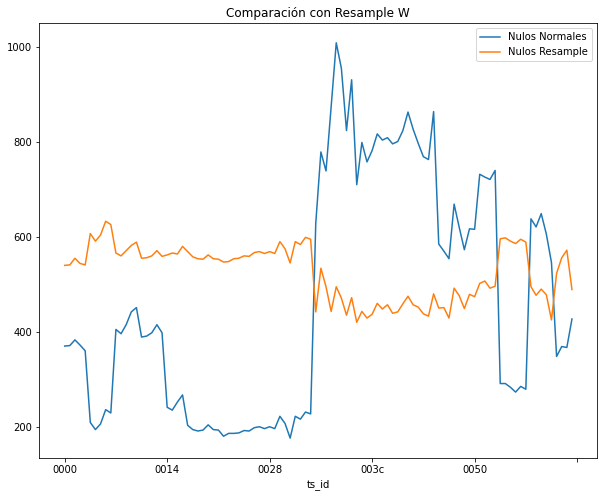

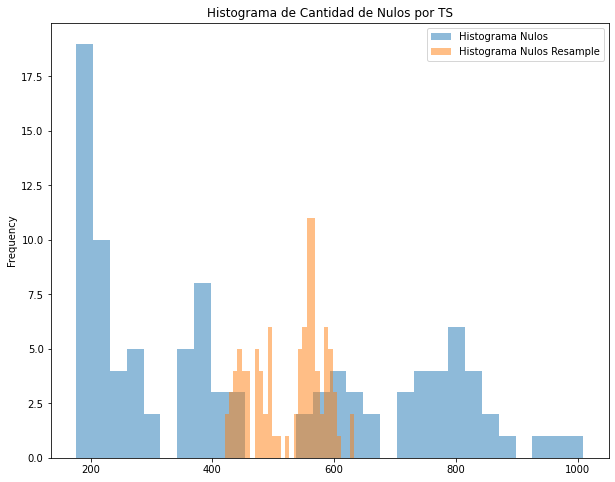

In [16]:
analyzer = AnalyzeResample(ts_df, 'W')
ts_resample_w = analyzer.analyze()

# Ejemplos

* A continuación se muestran cómo se ven las series de tiempo con mayor cantidad de Nulos en este nivel de Resampling.

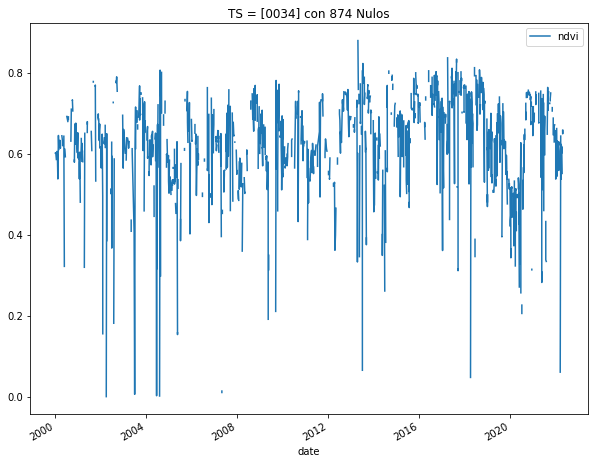

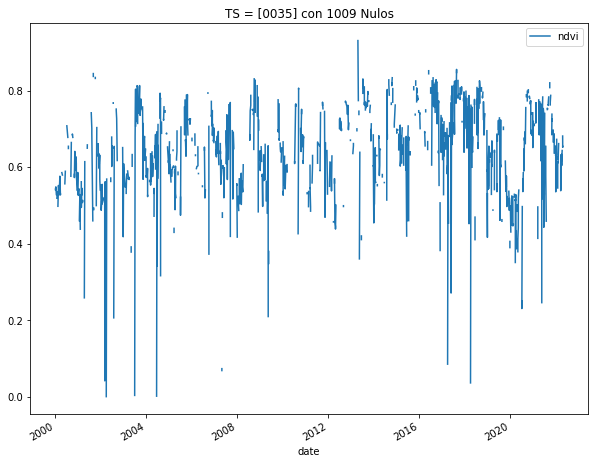

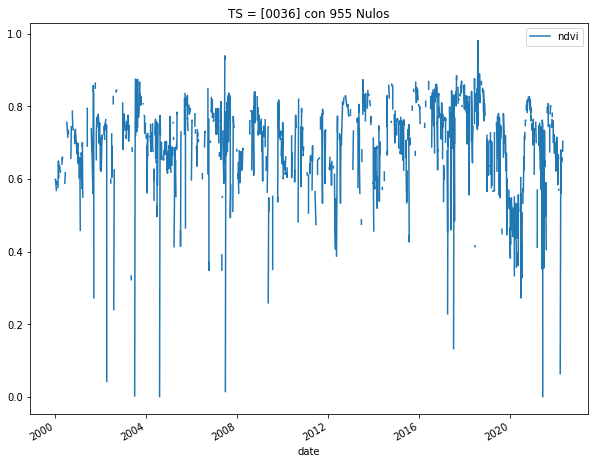

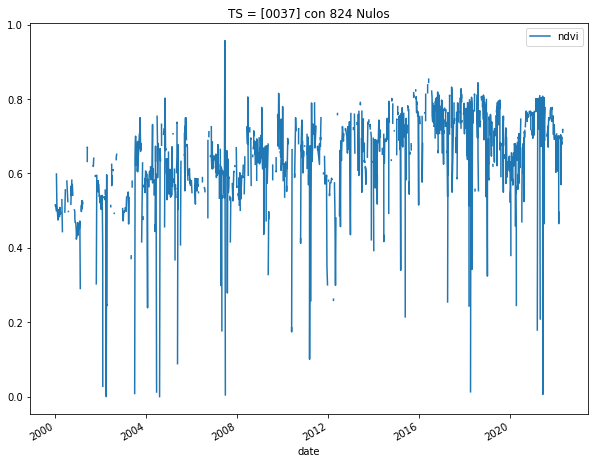

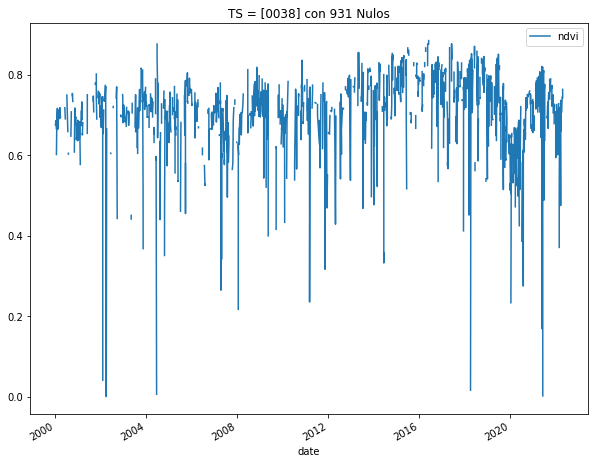

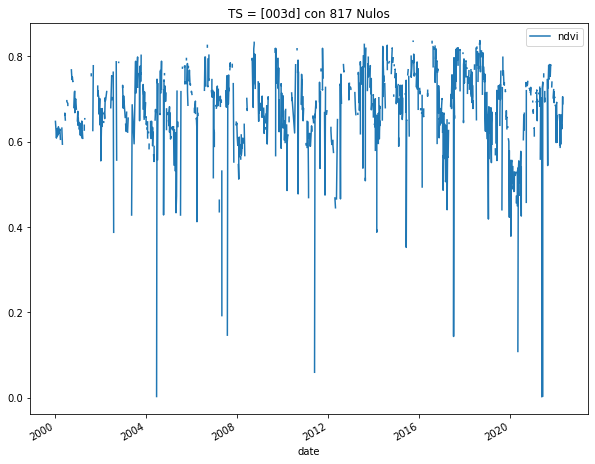

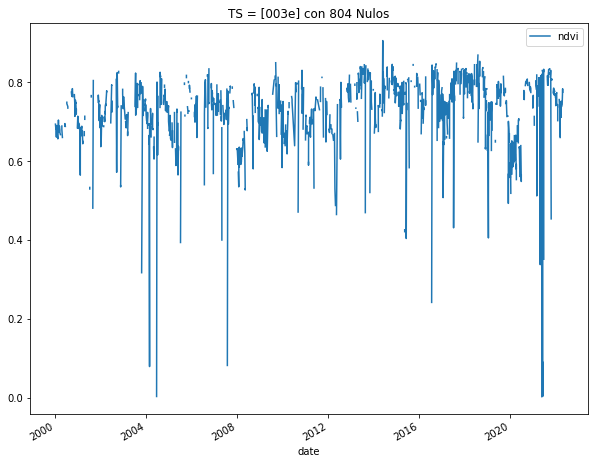

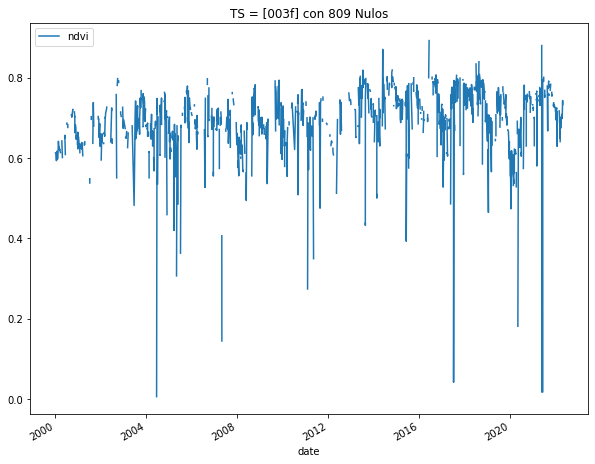

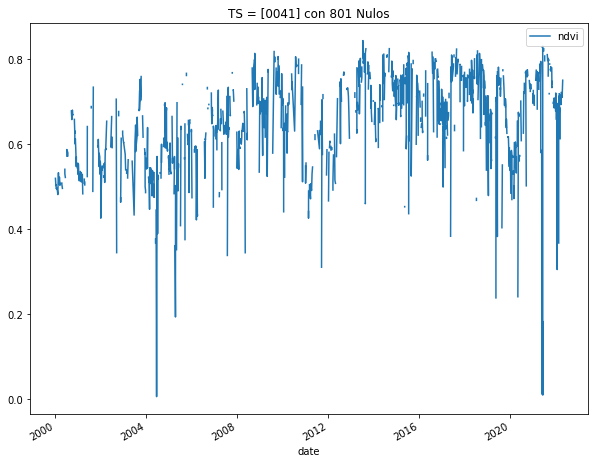

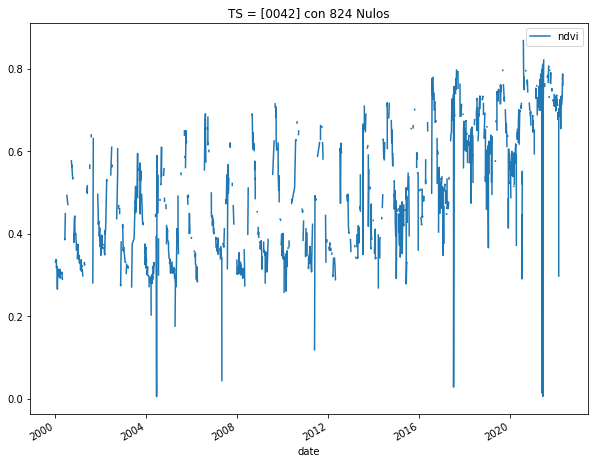

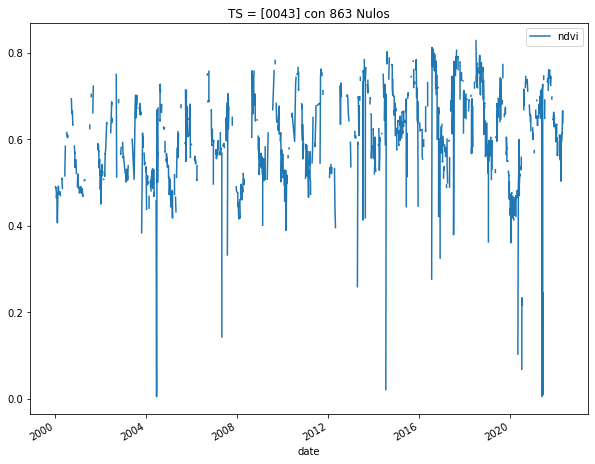

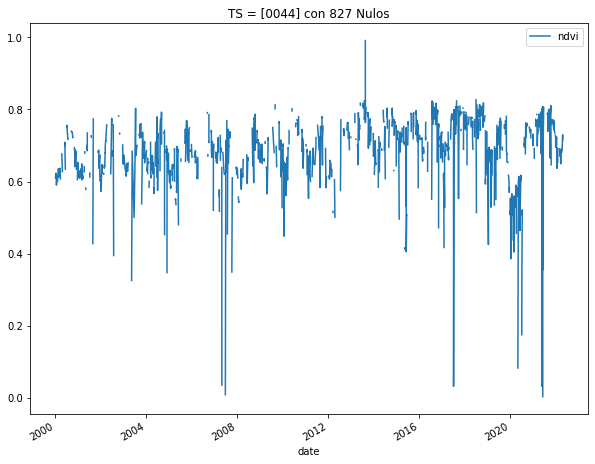

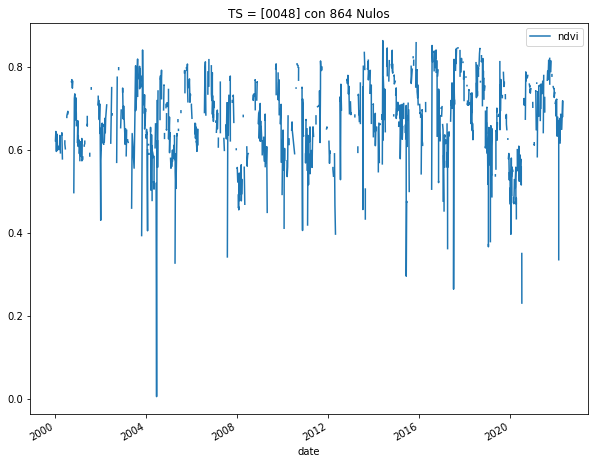

In [17]:
plot_examples(ts_df, threshold = 800)


/home/alfonso/miniconda3/envs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


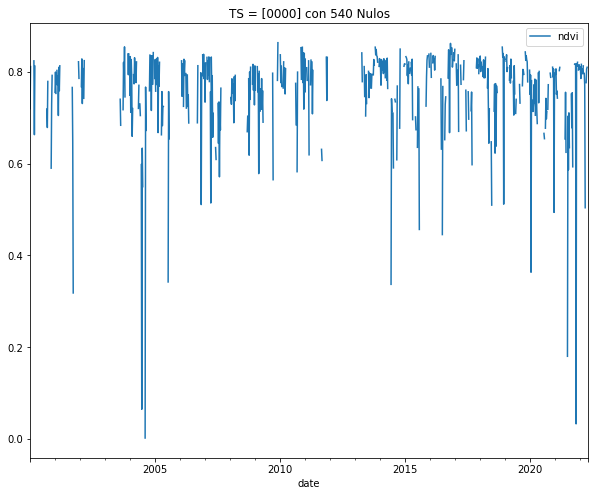

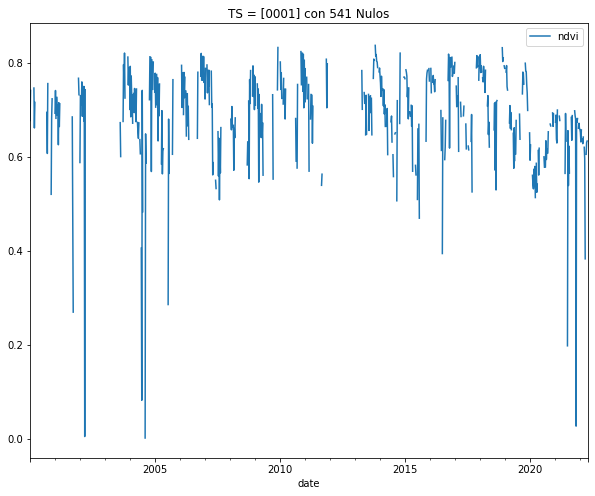

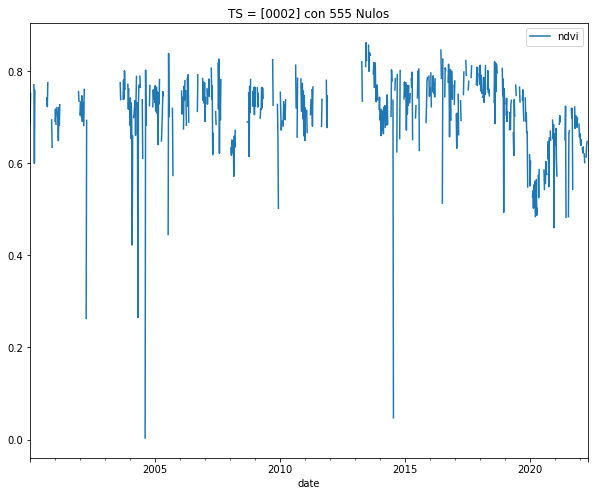

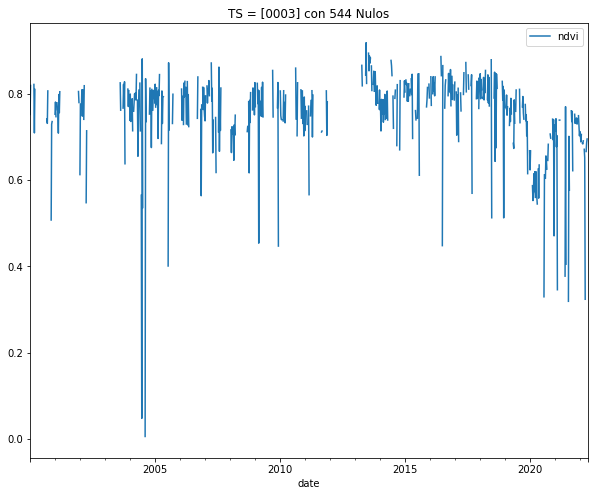

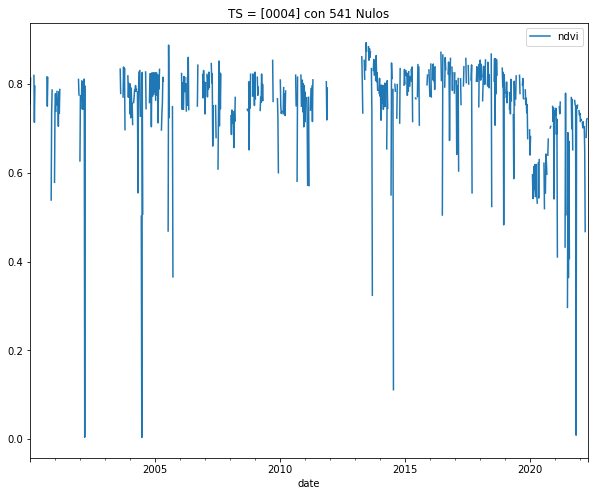

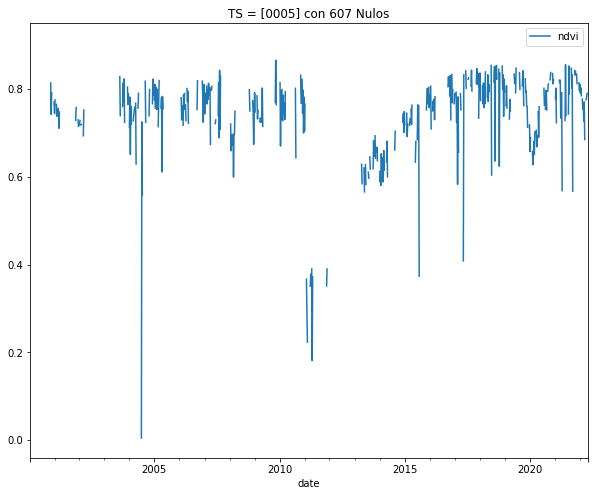

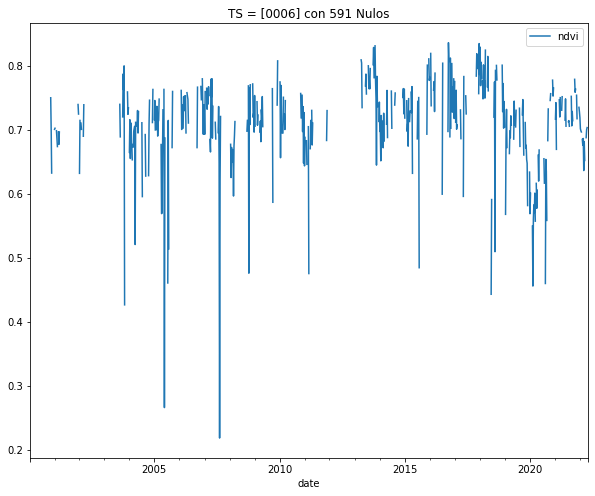

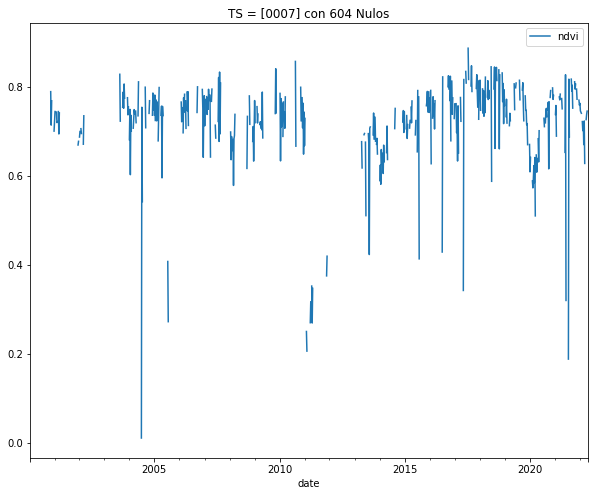

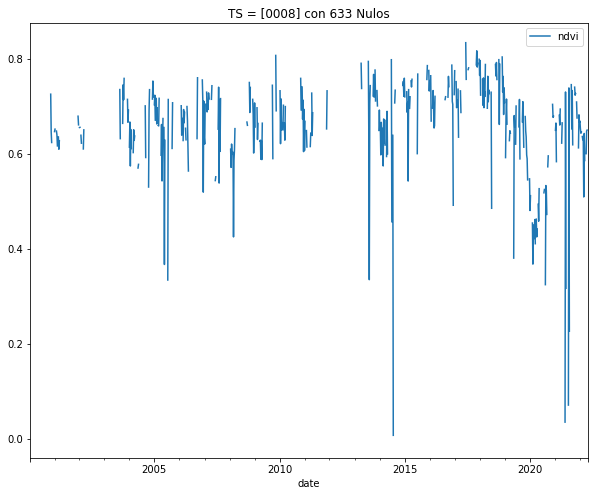

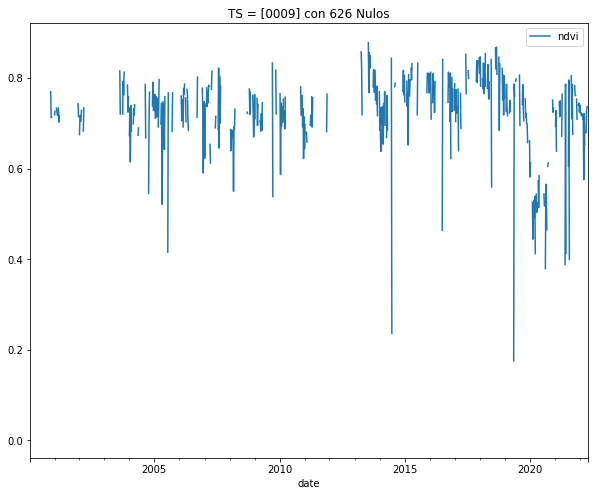

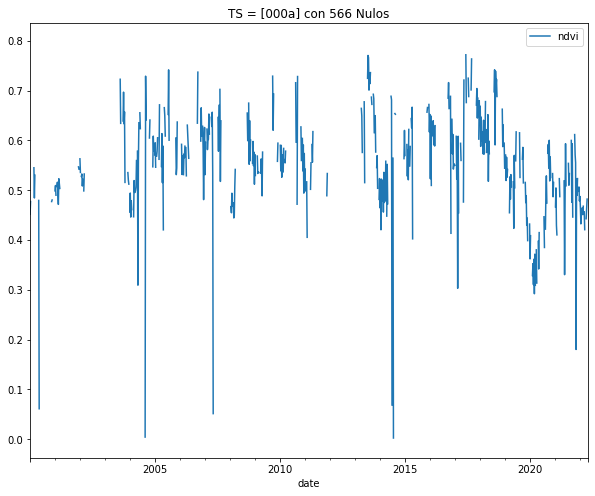

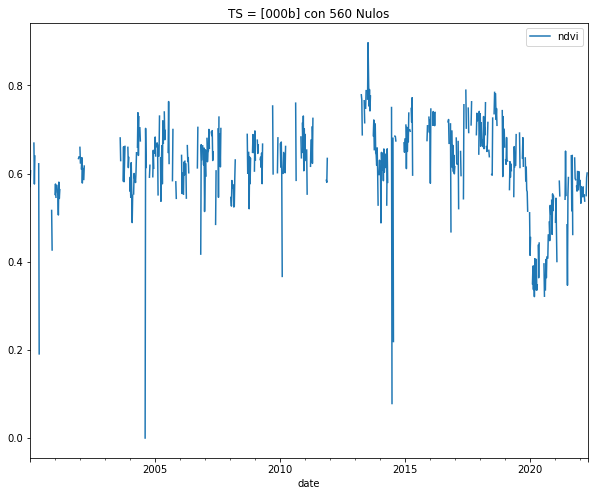

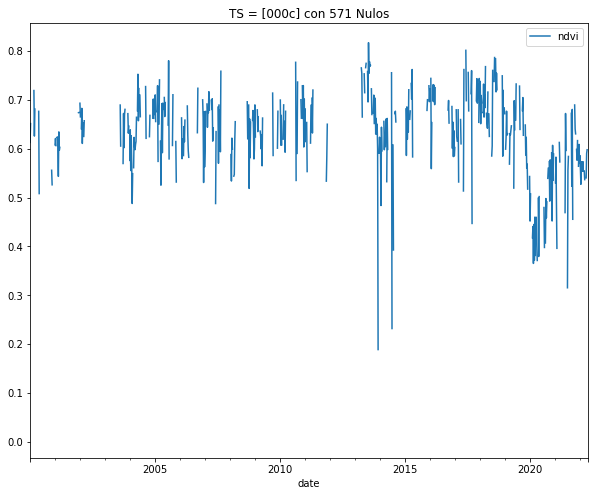

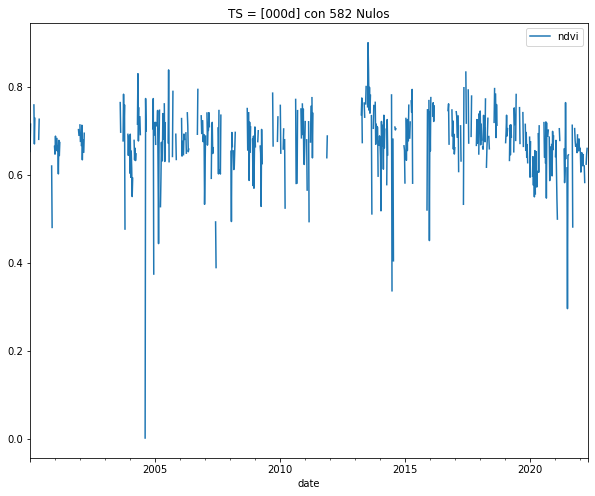

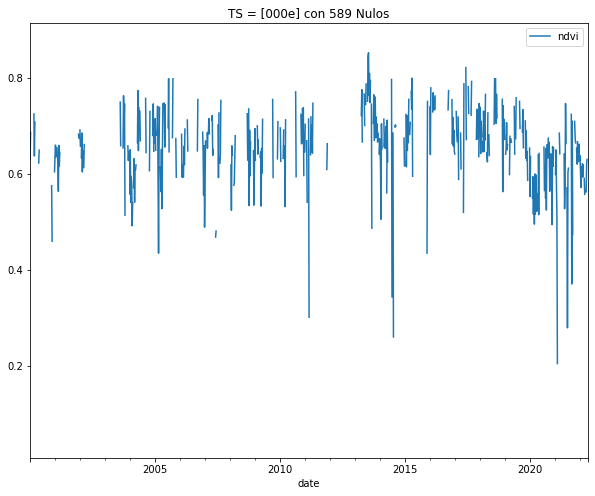

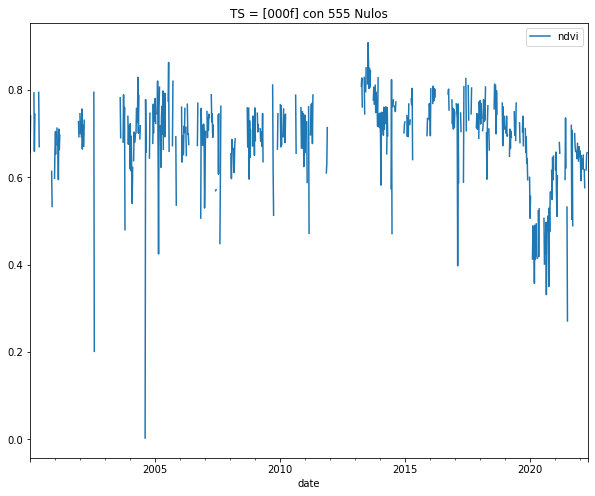

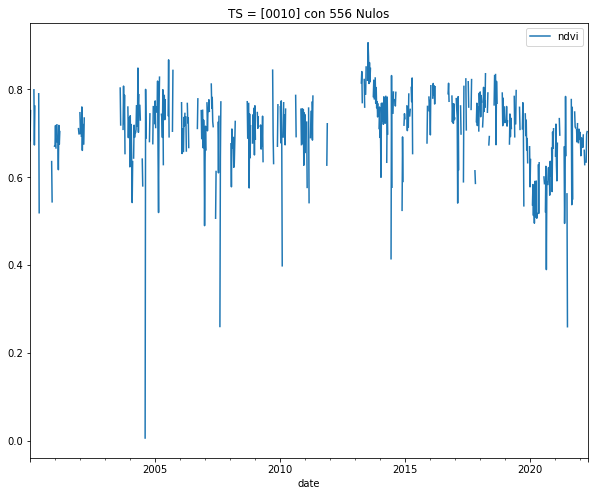

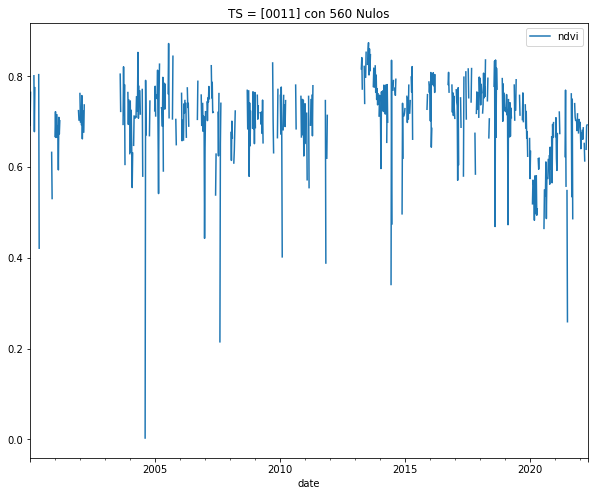

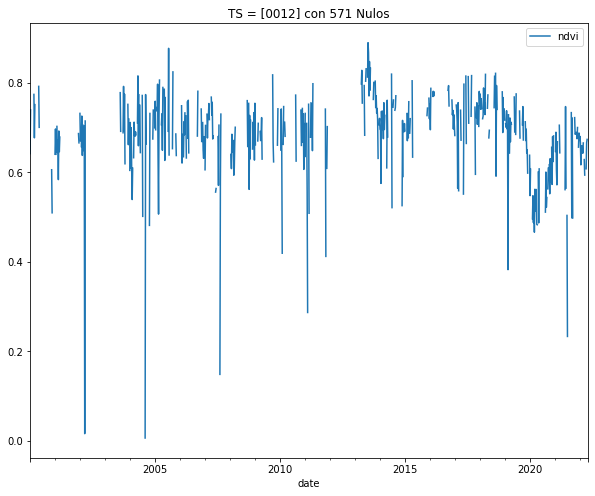

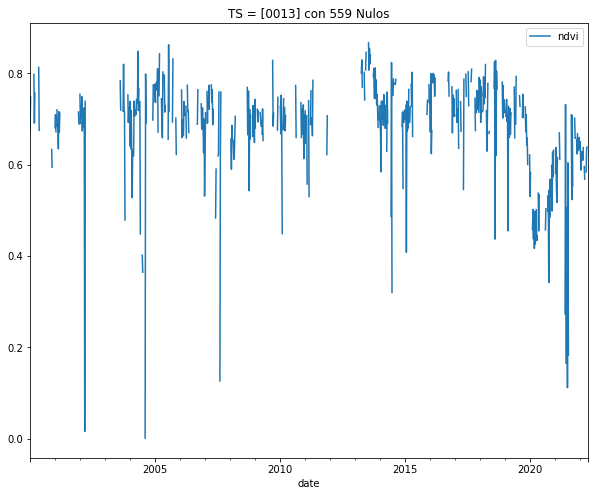

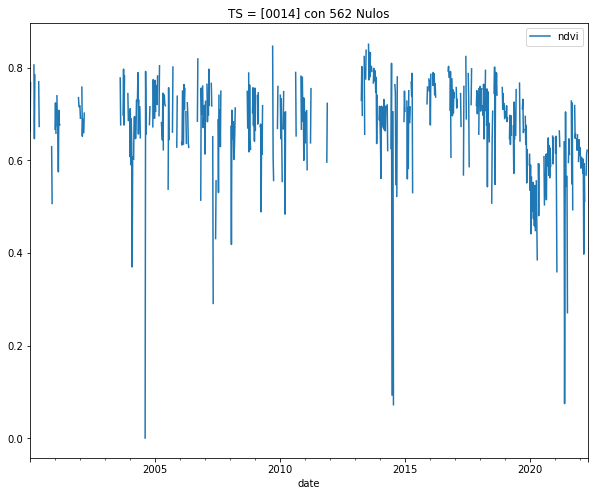

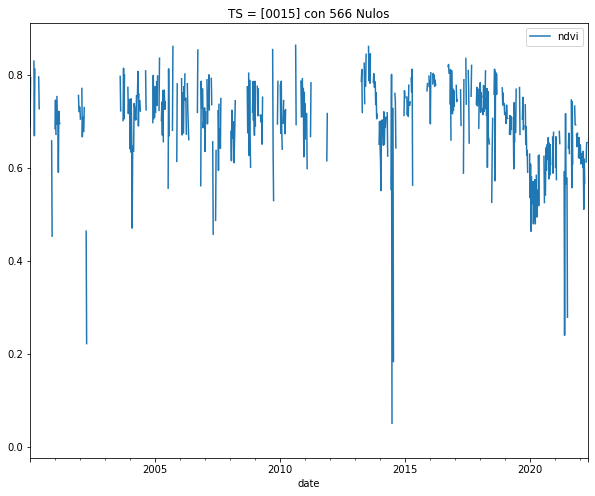

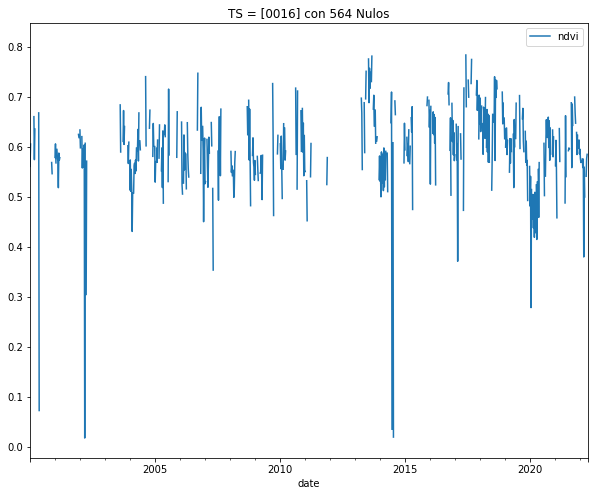

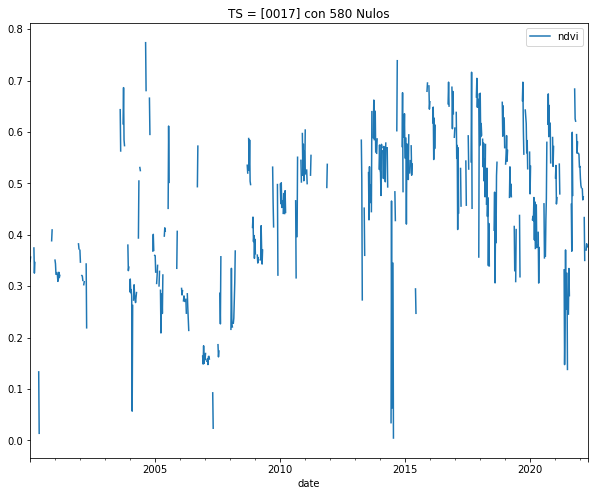

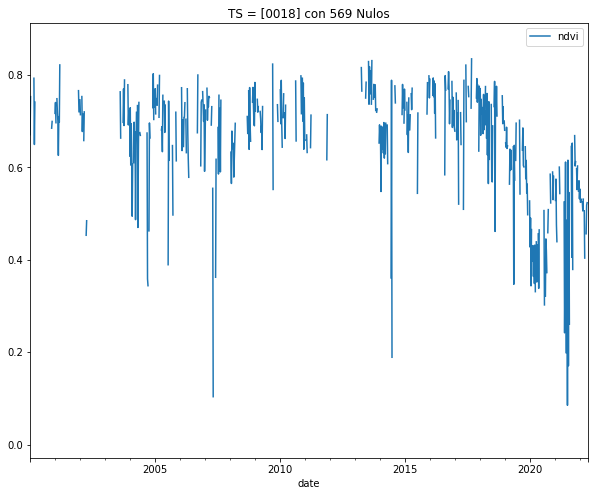

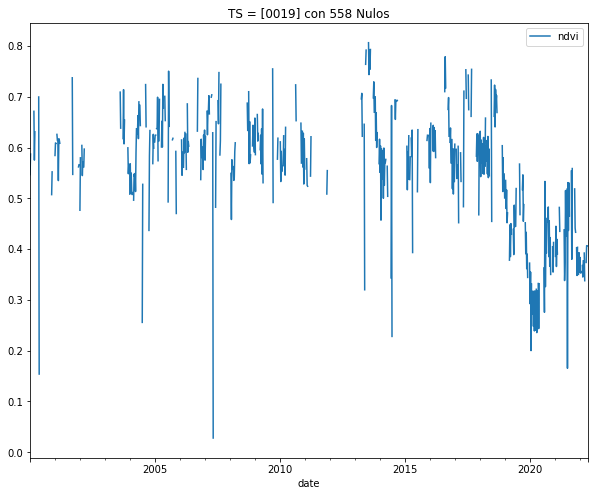

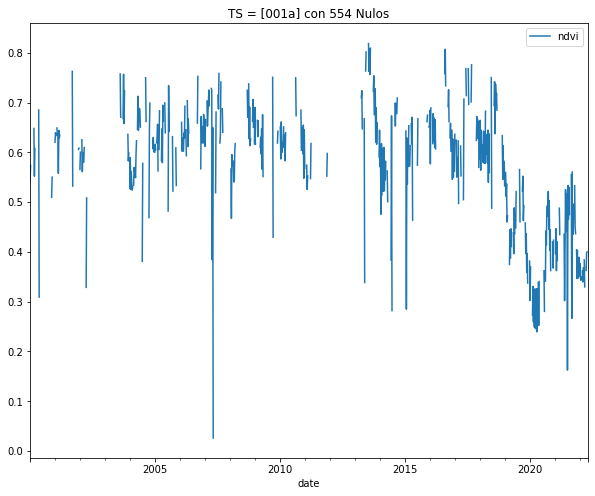

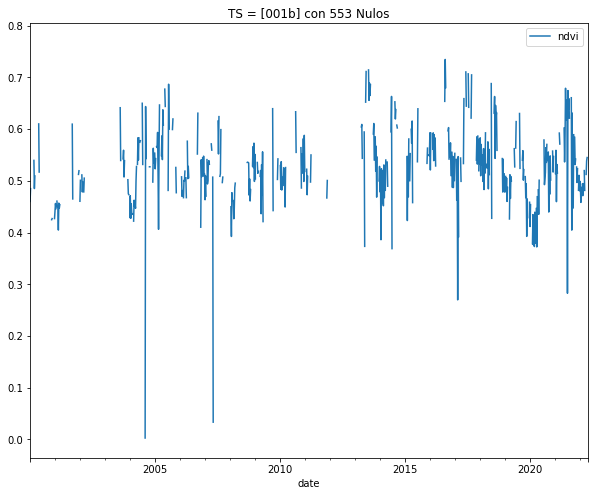

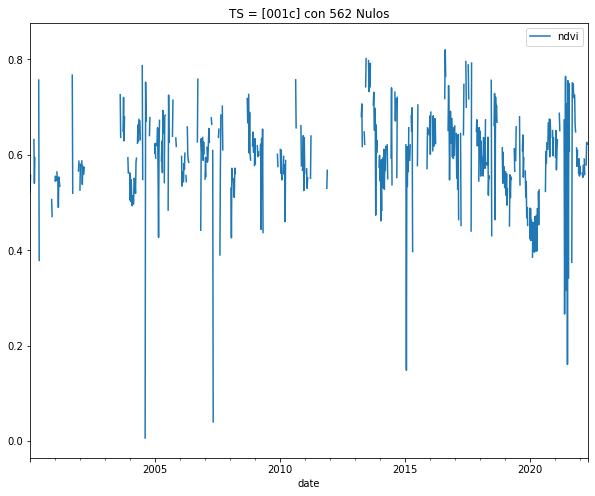

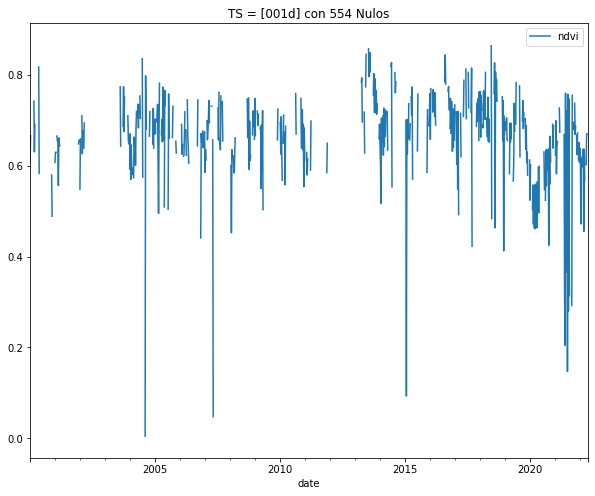

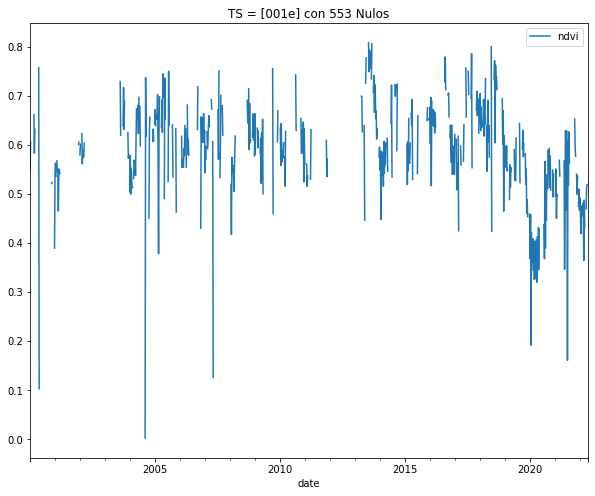

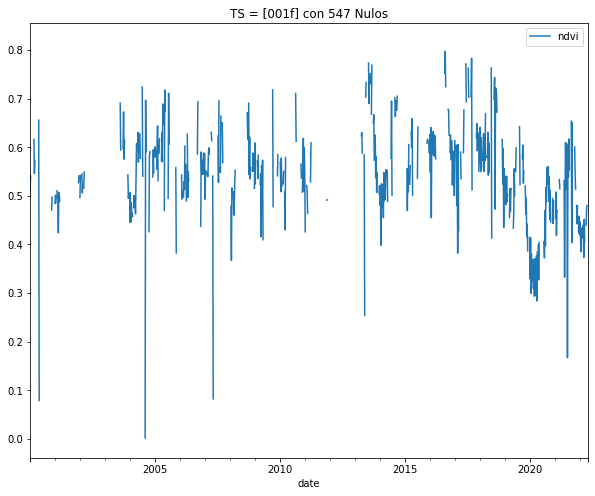

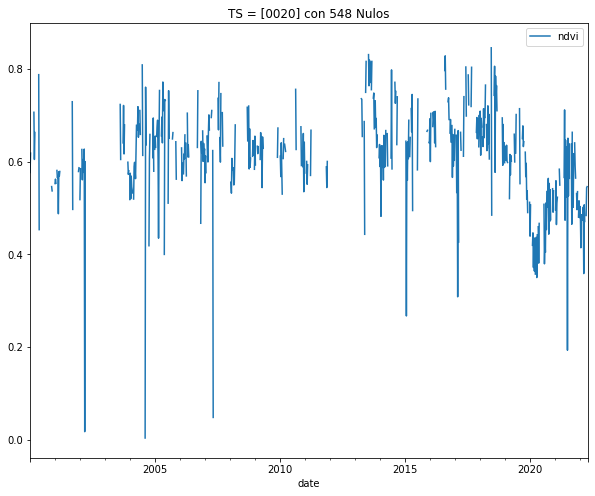

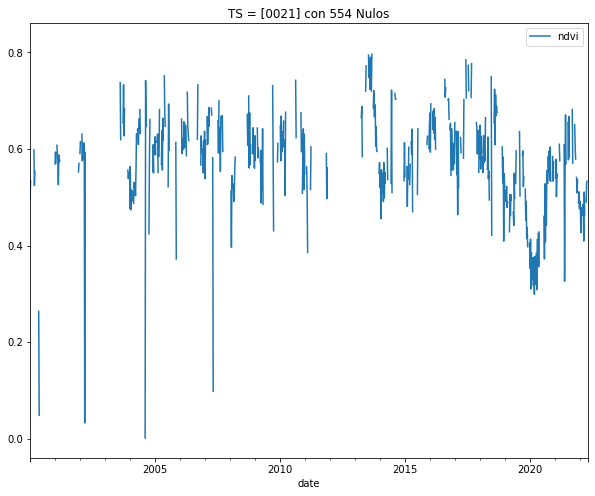

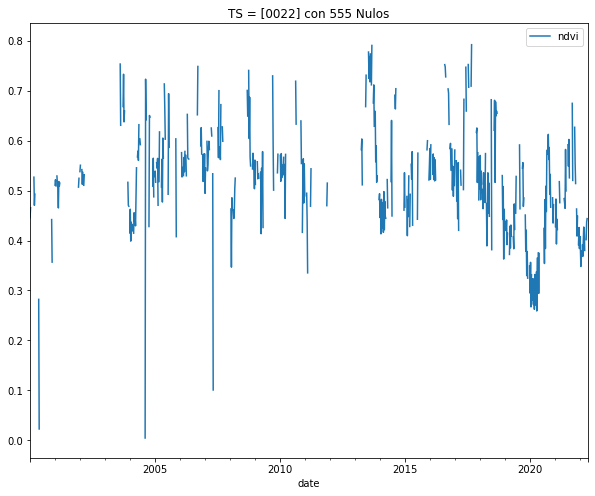

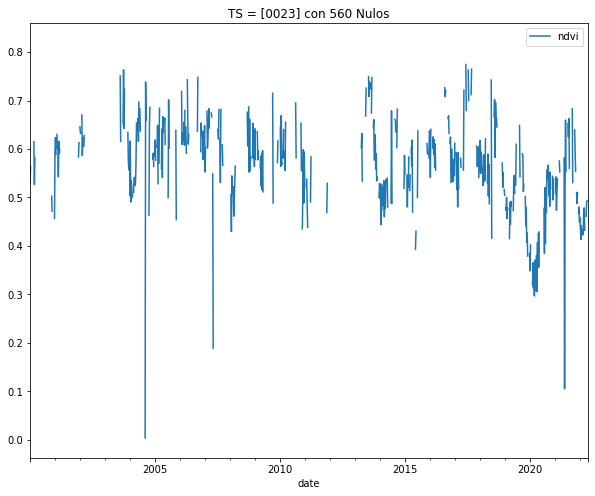

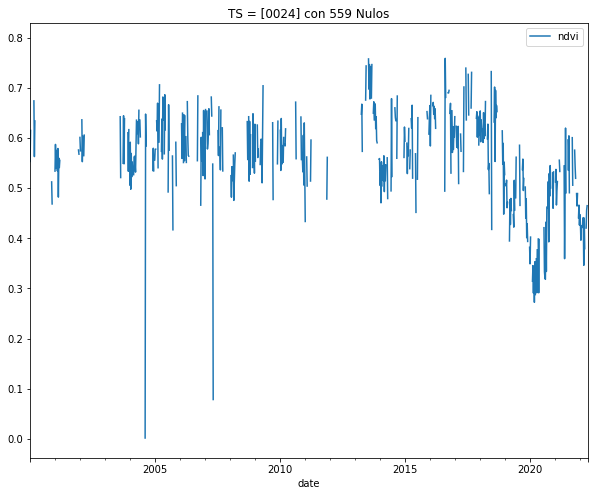

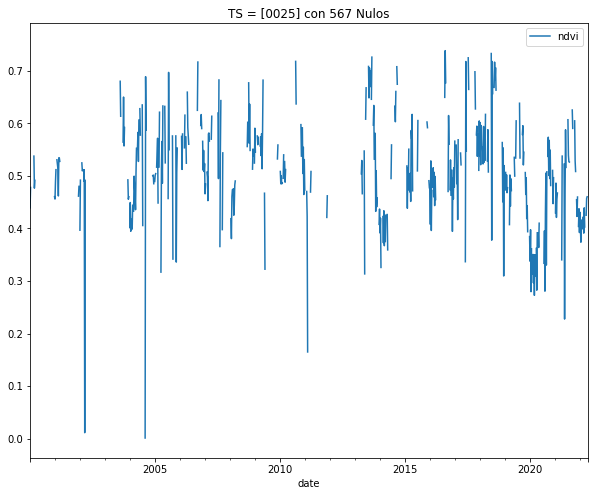

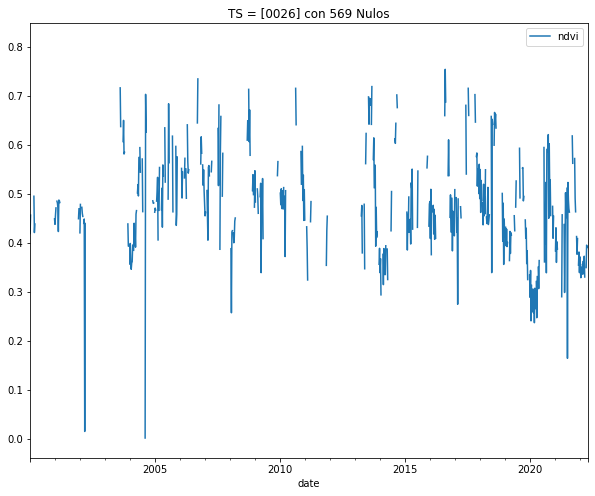

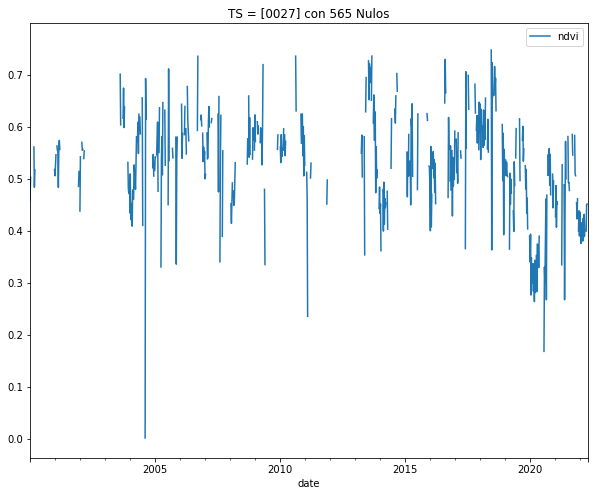

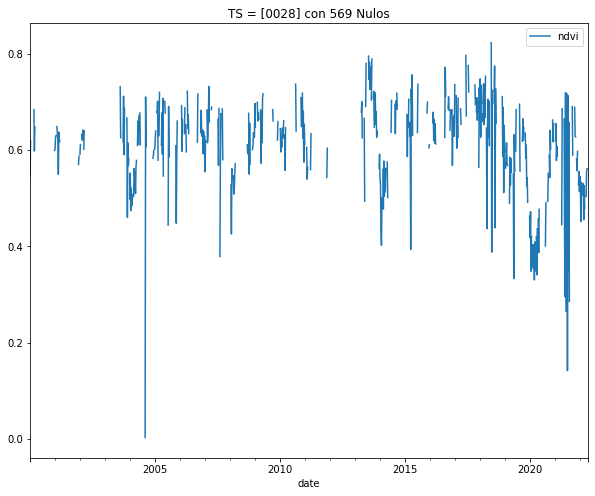

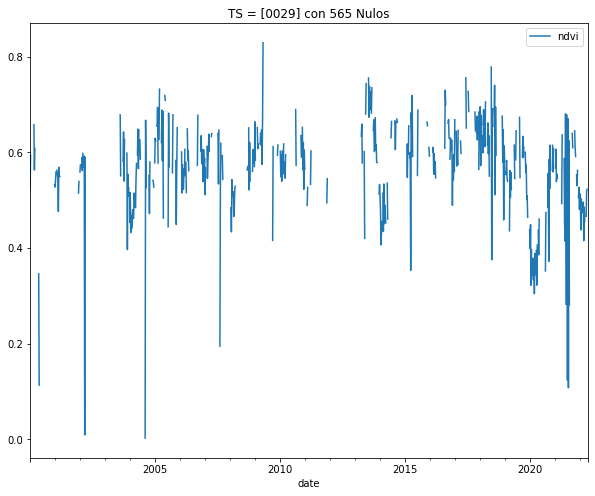

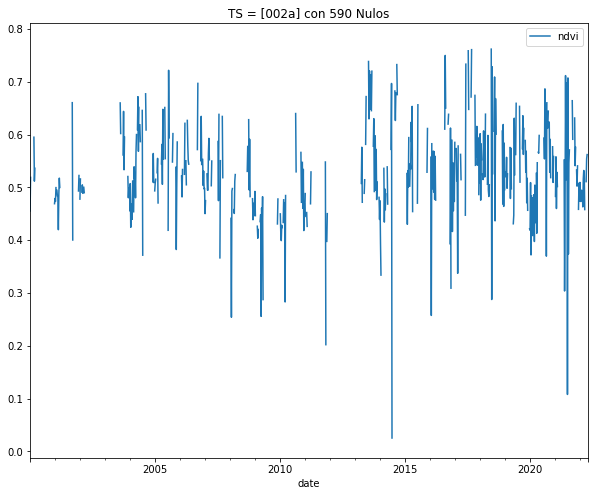

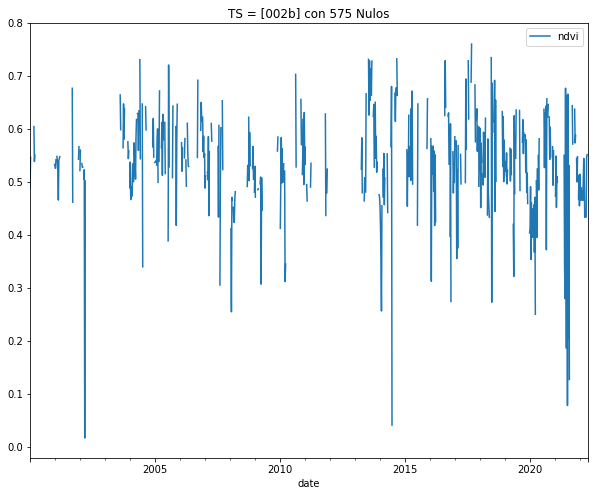

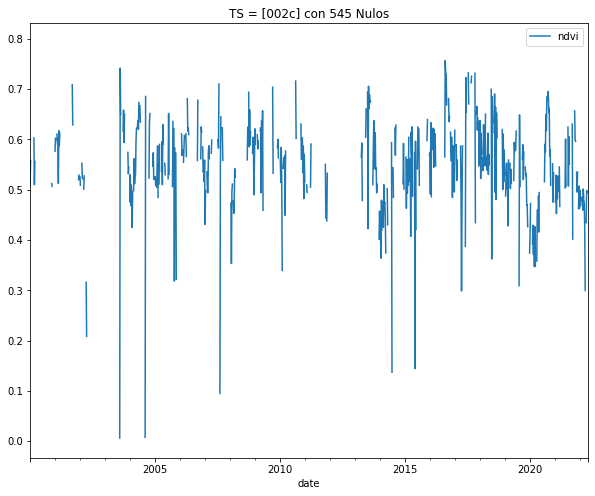

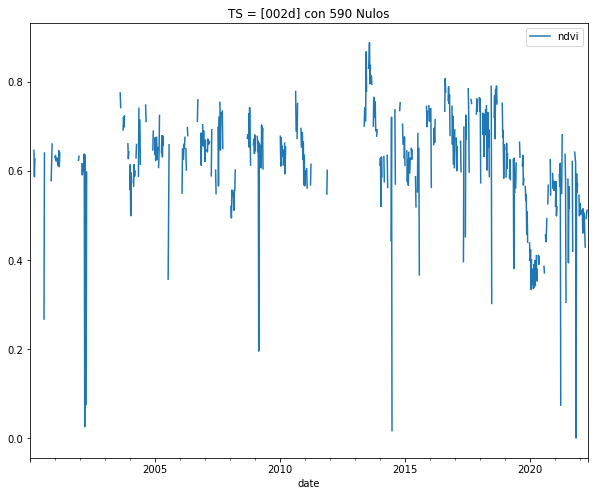

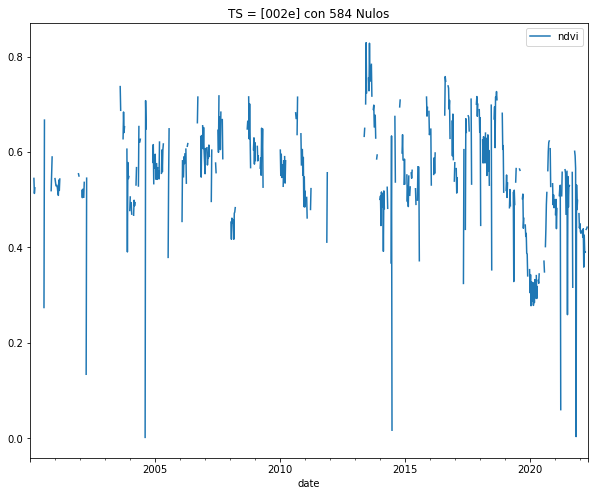

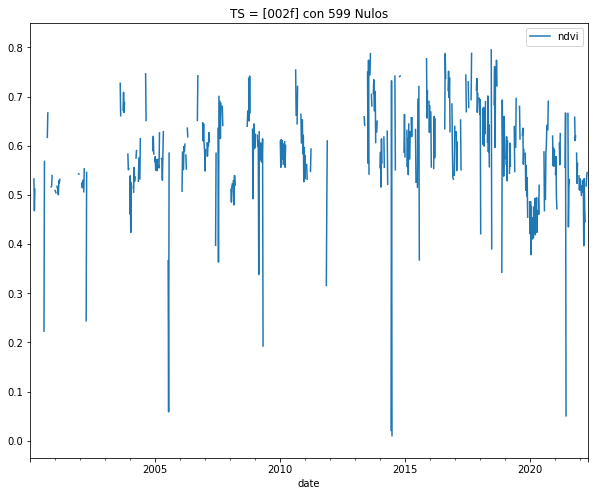

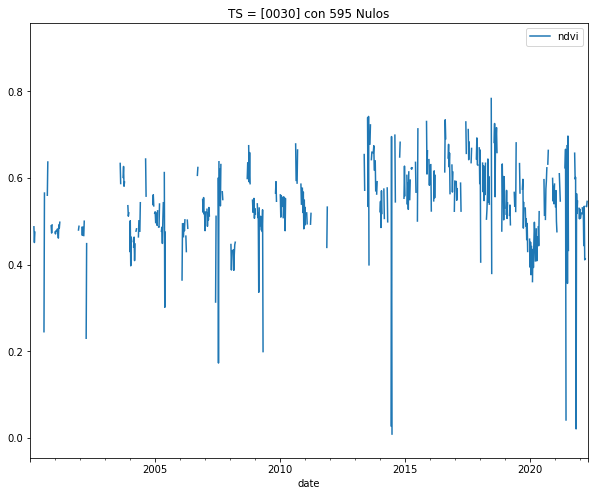

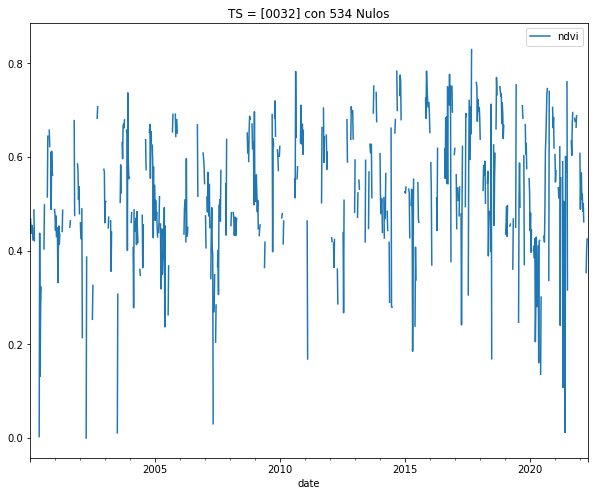

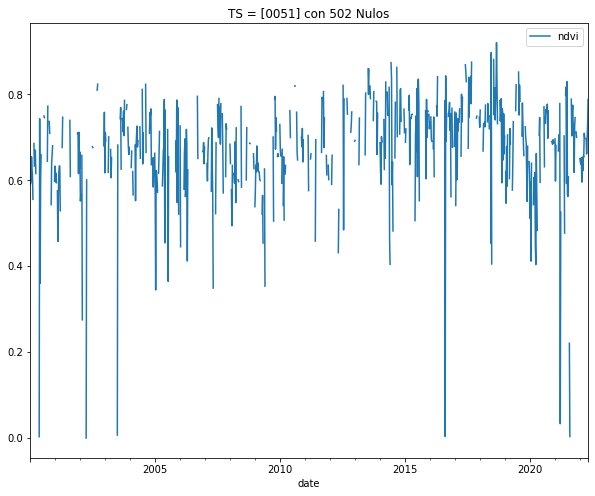

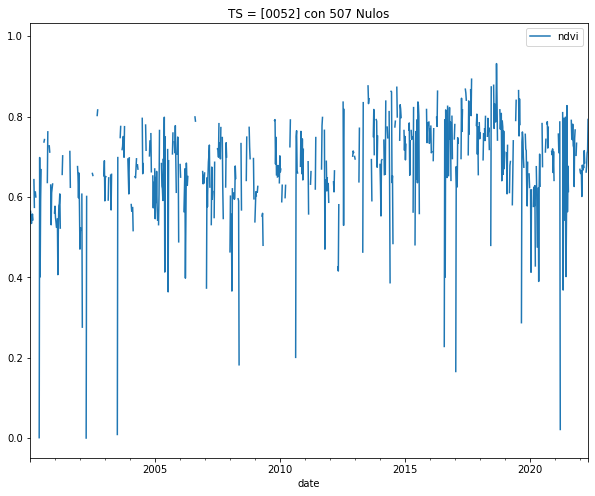

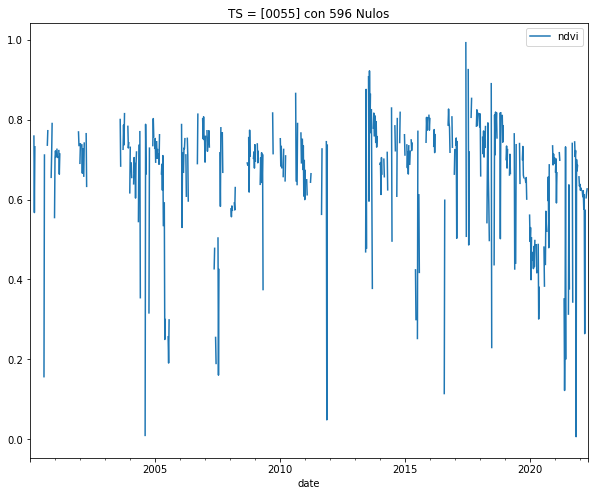

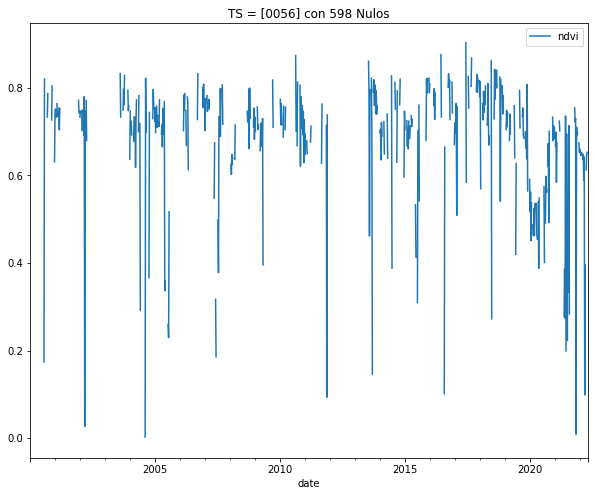

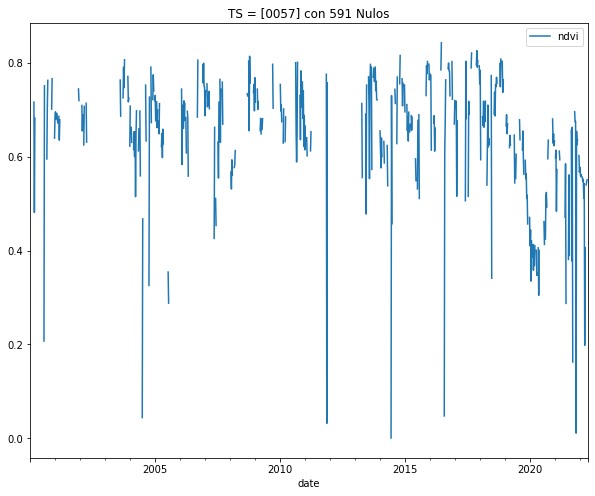

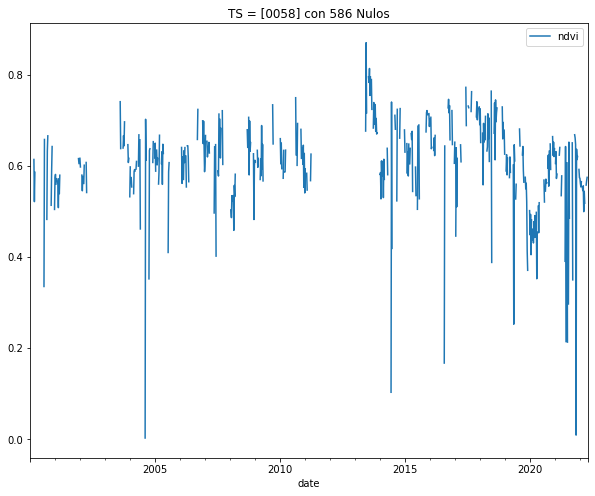

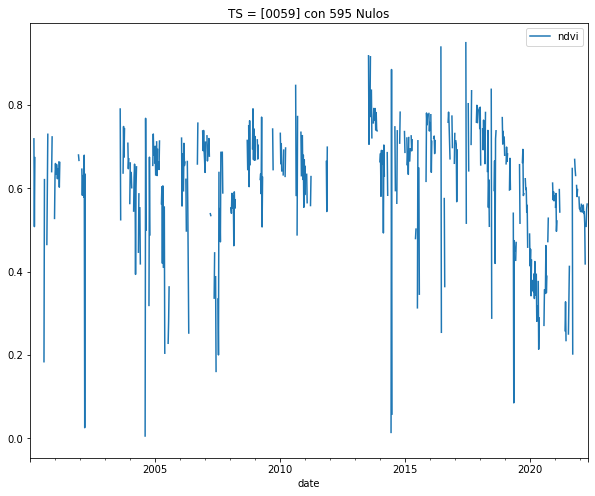

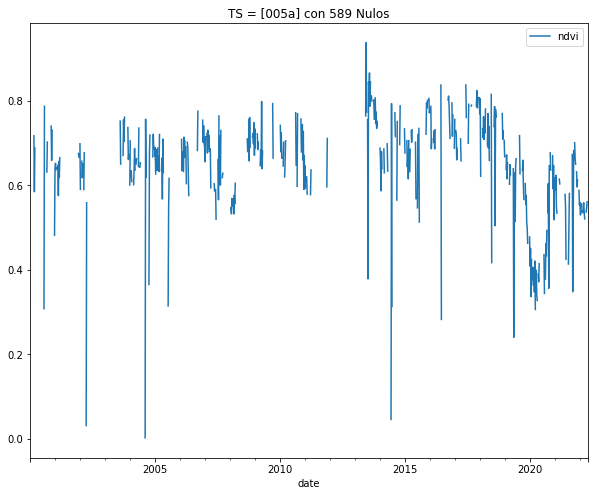

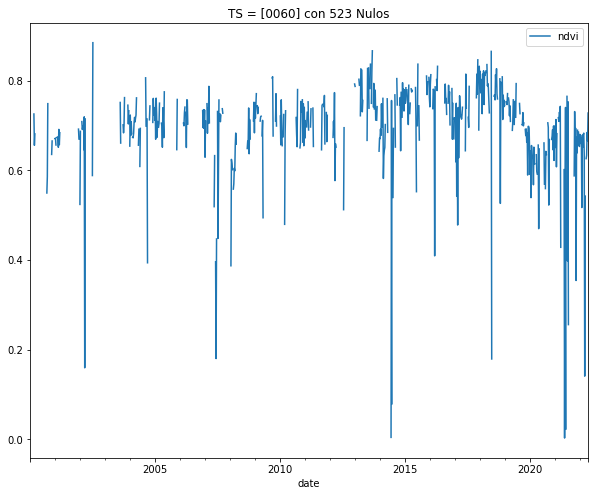

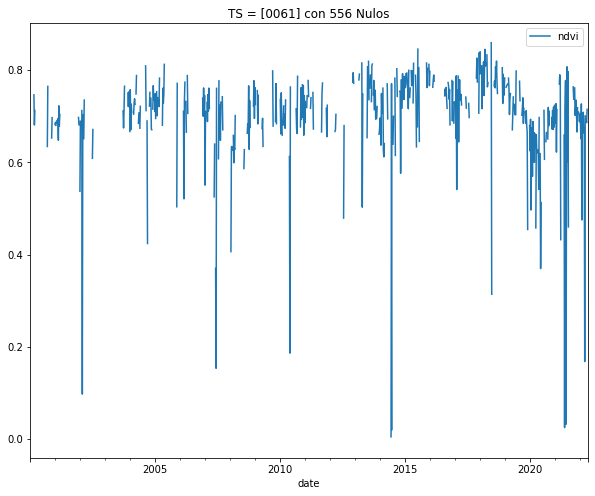

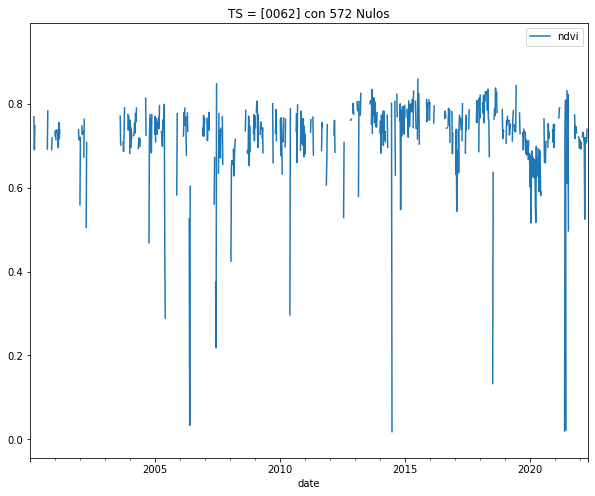

In [18]:
plot_examples(ts_resample_w, threshold = 500)

## Resampling Bisemanal


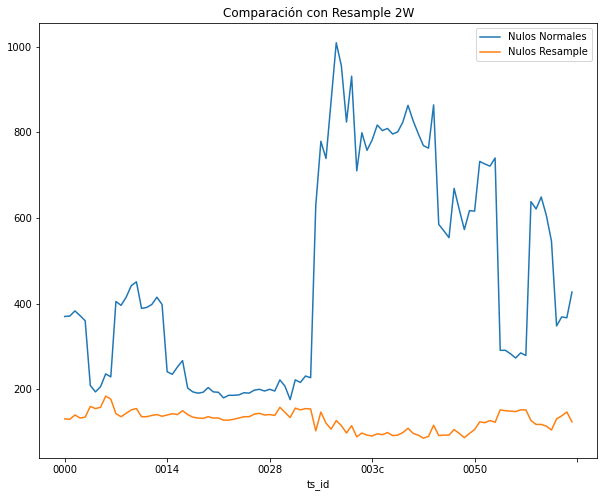

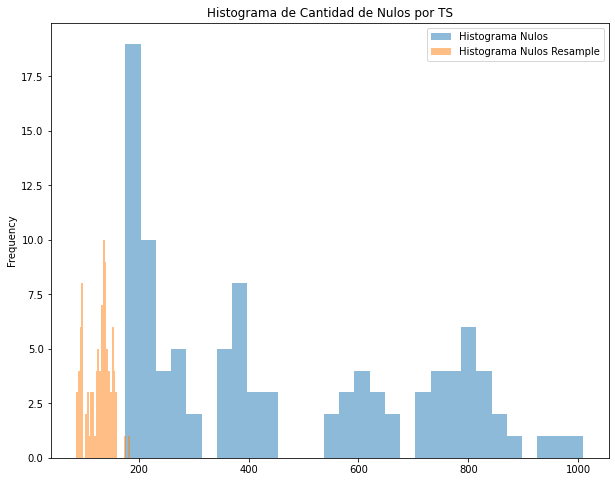

Número de TSs: 100
Largo Promedio por TS: 583.0
Promedio de Nulos por TS: 127.51


In [19]:
analyzer = AnalyzeResample(ts_df, '2W')
ts_resample_2w = analyzer.analyze()
ts_stats(ts_resample_2w)

# Resampling Mensual

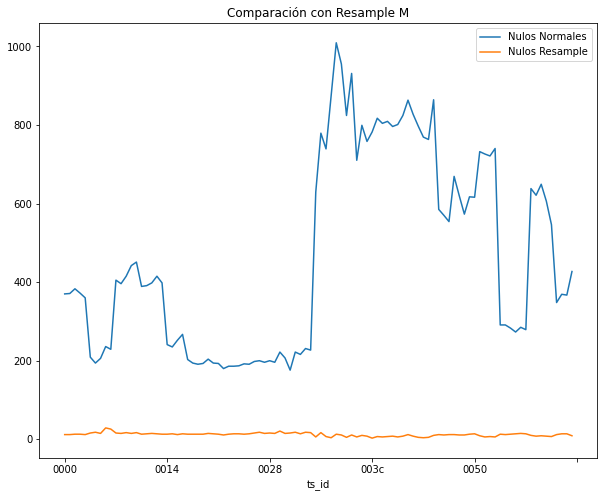

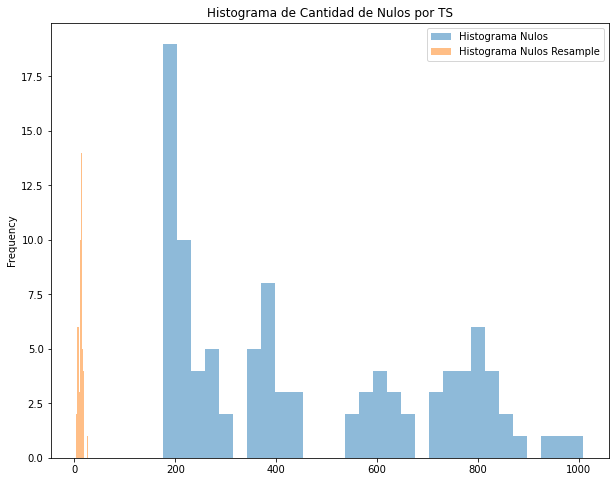

Número de TSs: 100
Largo Promedio por TS: 268.0
Promedio de Nulos por TS: 12.23


In [20]:
analyzer = AnalyzeResample(ts_df, 'M')
ts_resample_m = analyzer.analyze()
ts_stats(ts_resample_m)

# Ejemplos

* A continuación se muestran cómo se ven las series de tiempo con mayor cantidad de Nulos en este nivel de Resampling.

/home/alfonso/miniconda3/envs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


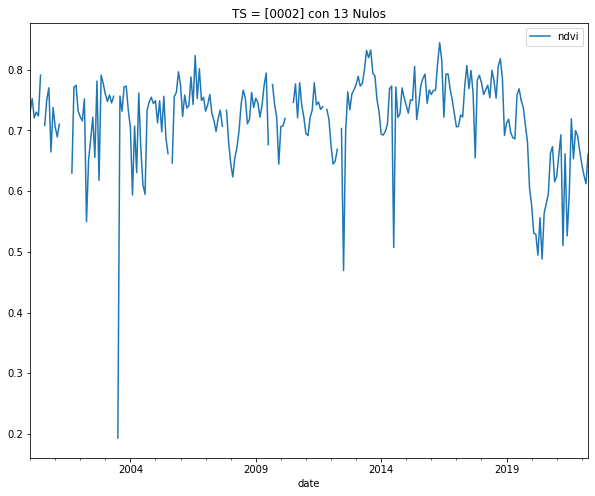

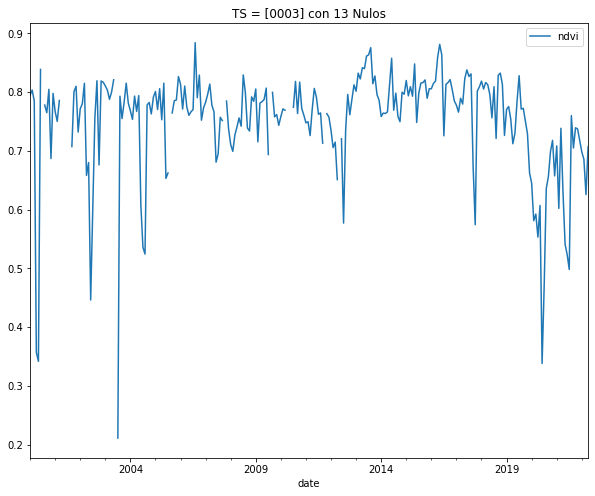

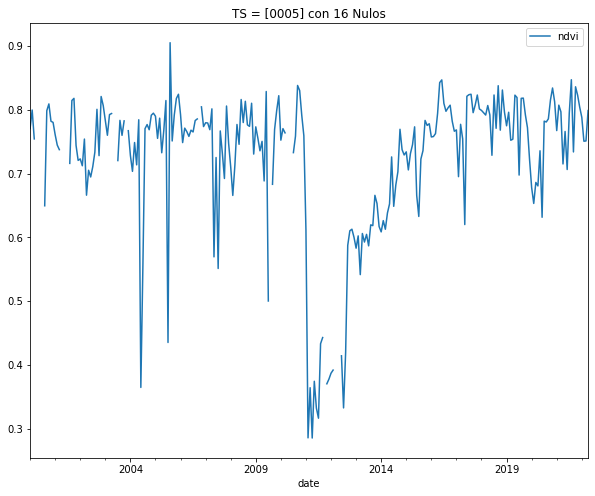

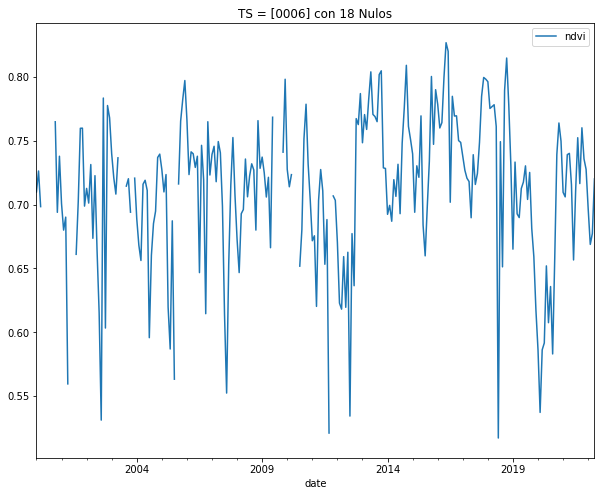

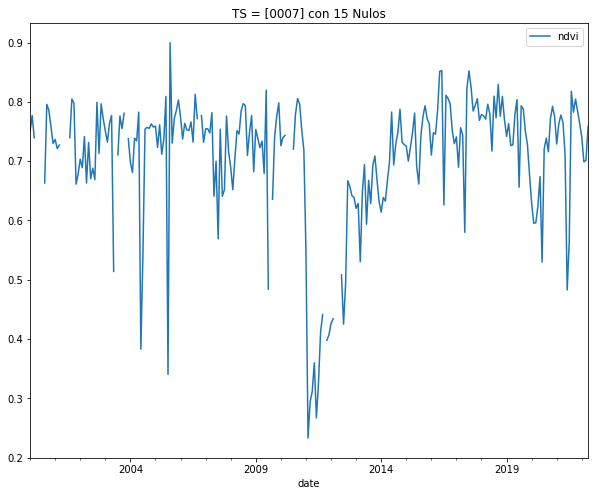

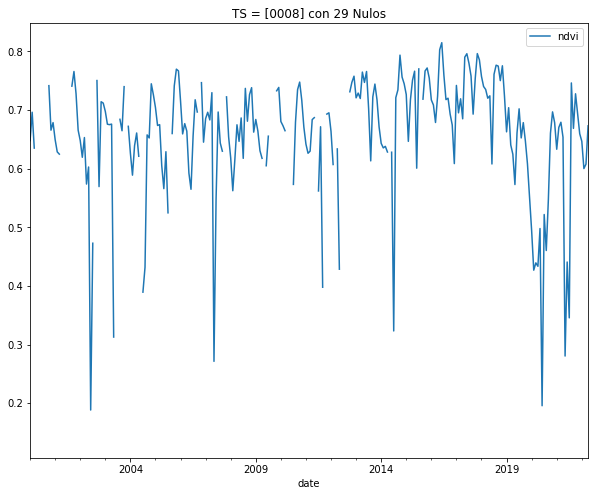

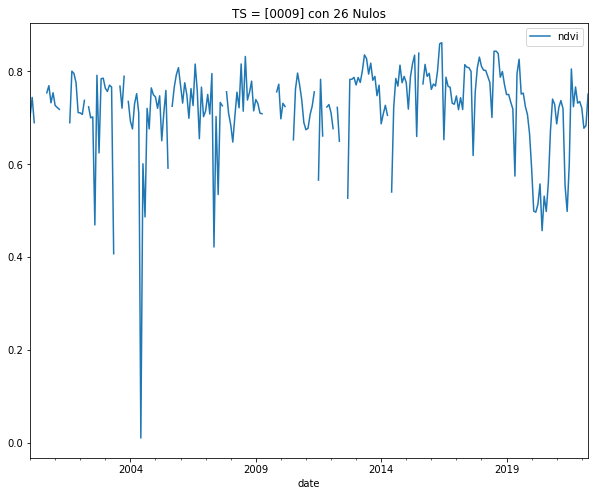

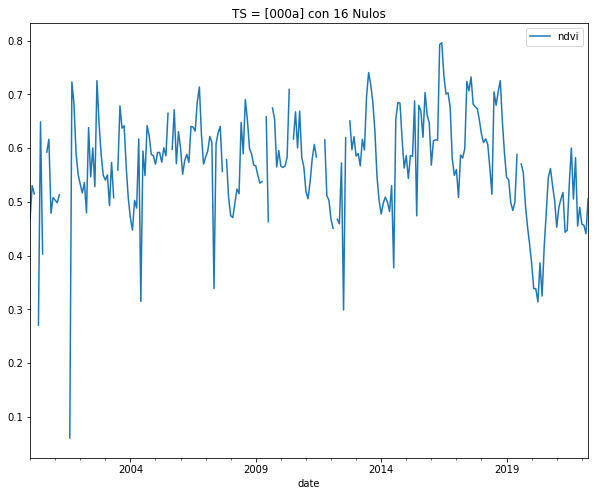

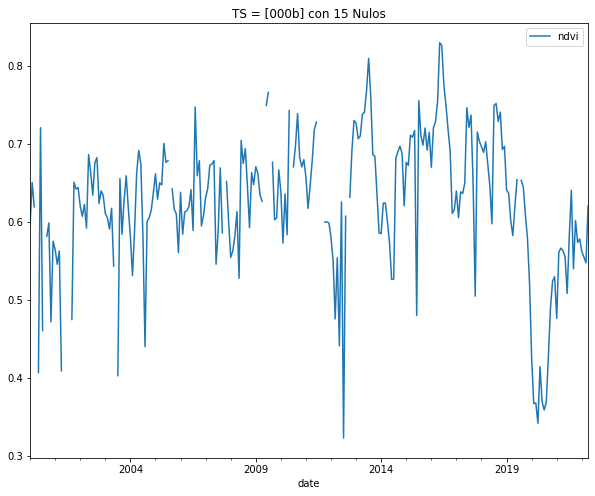

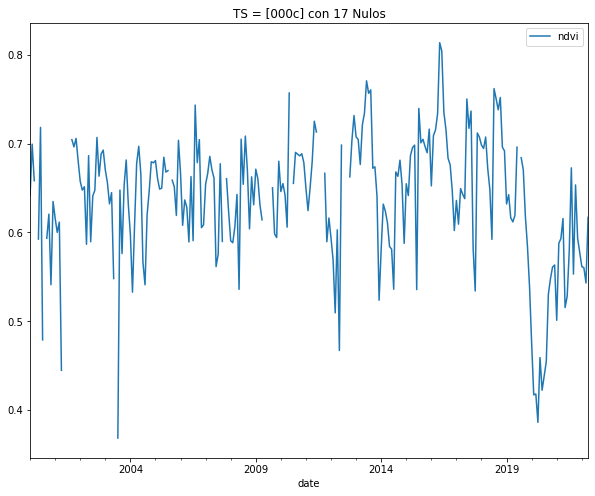

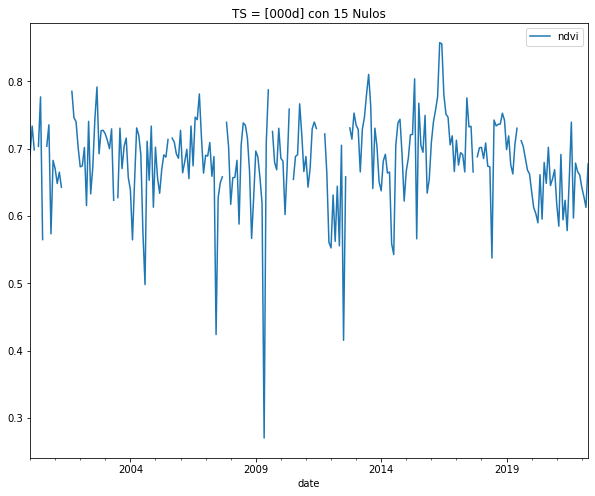

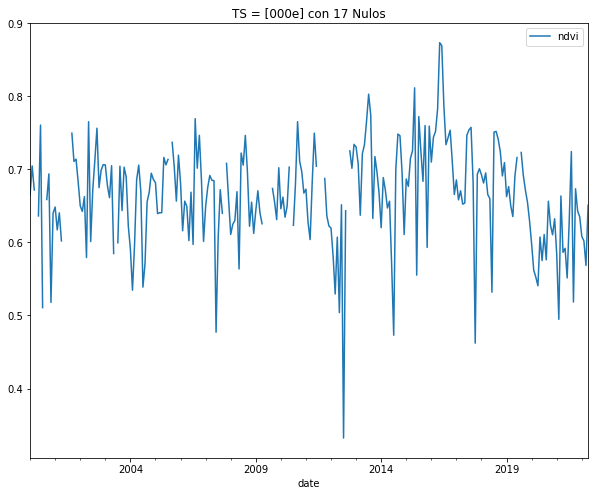

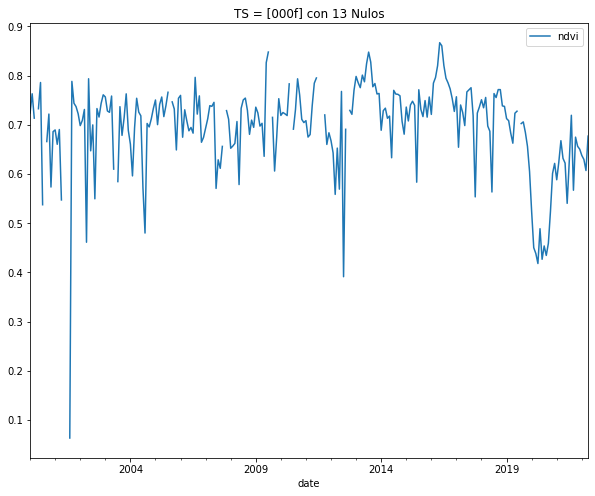

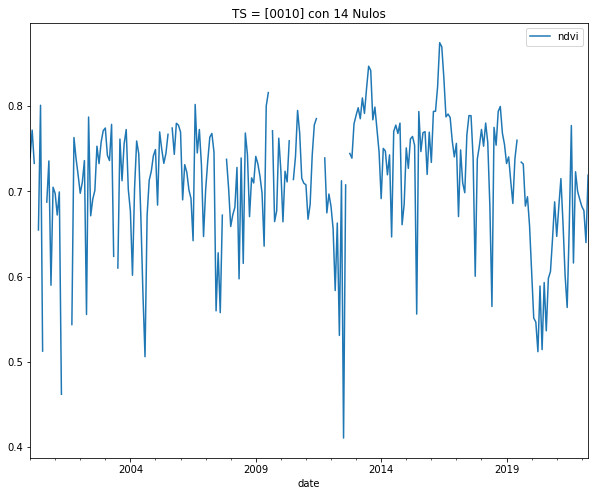

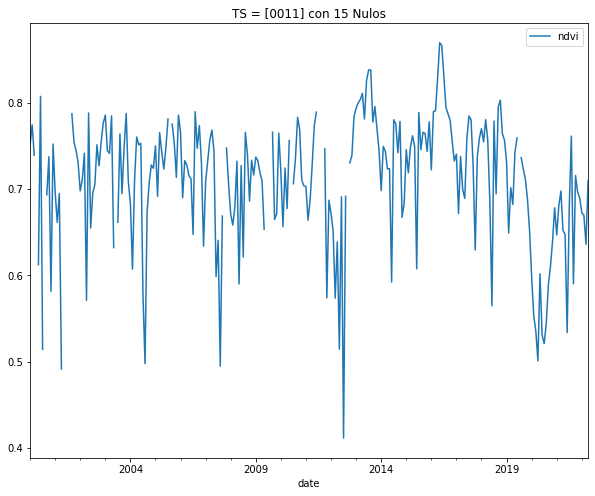

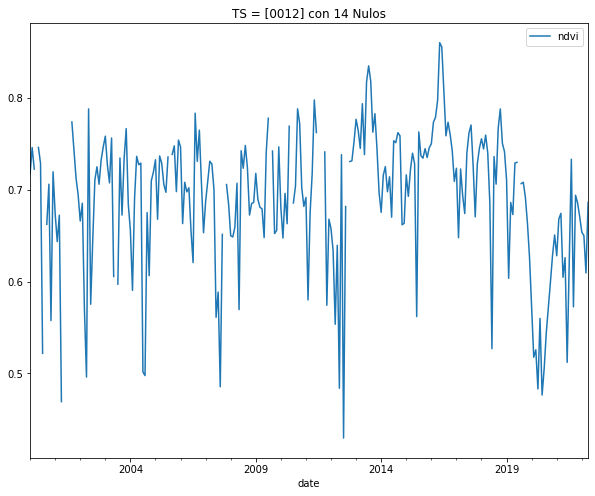

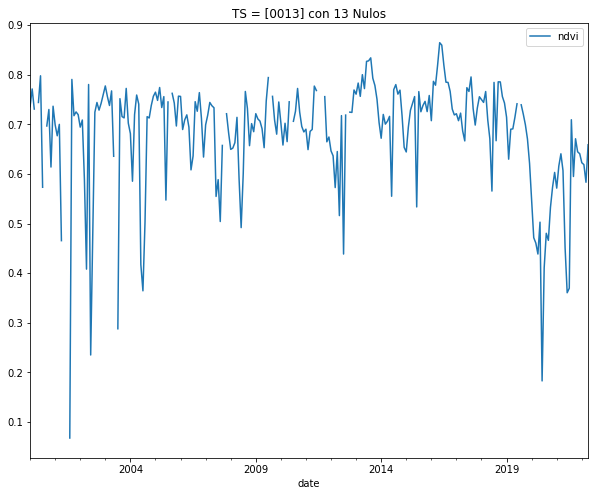

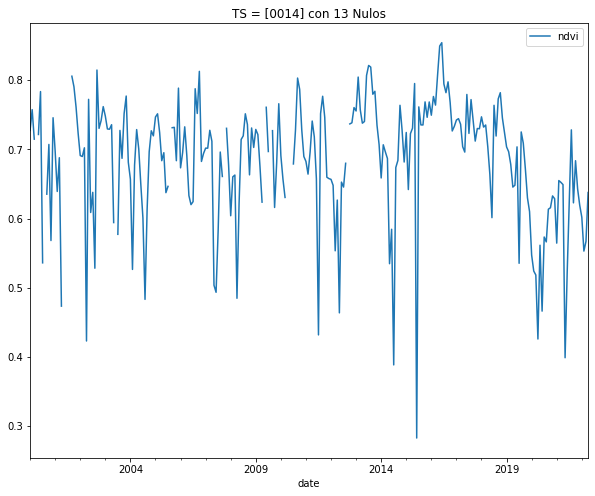

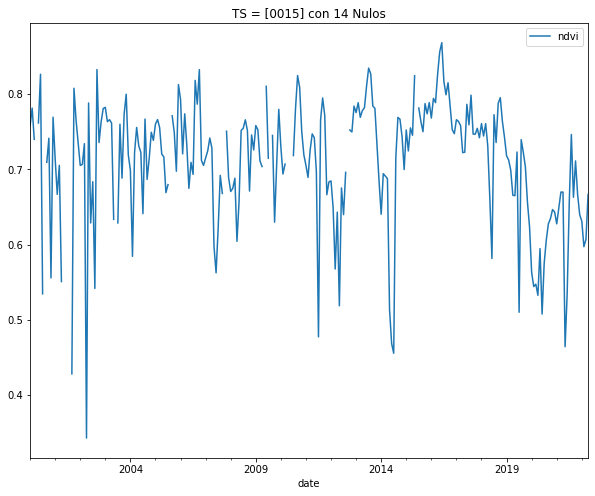

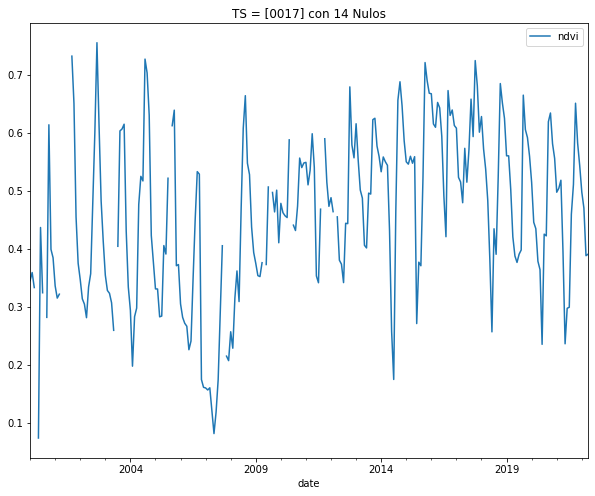

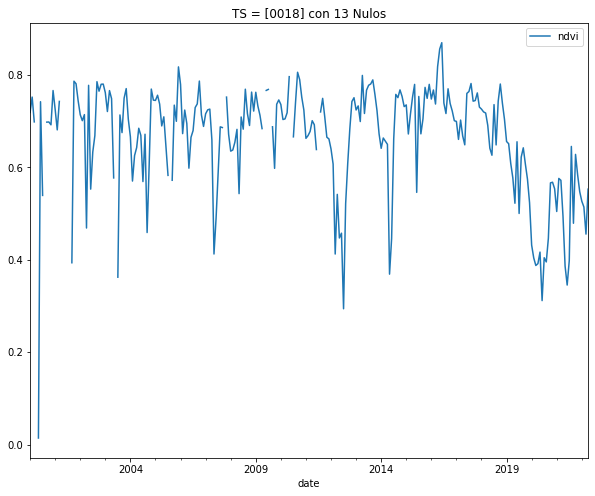

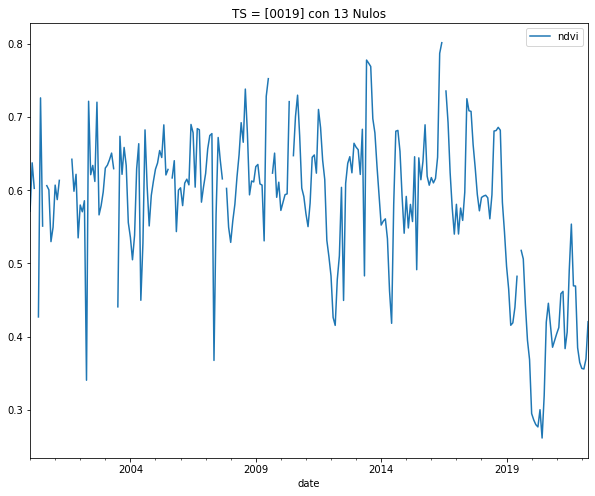

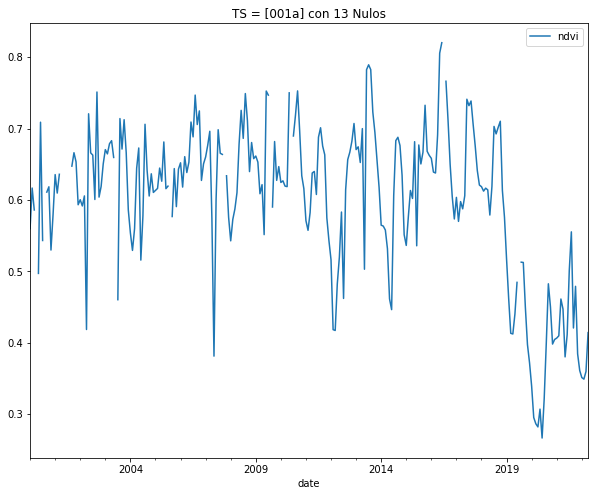

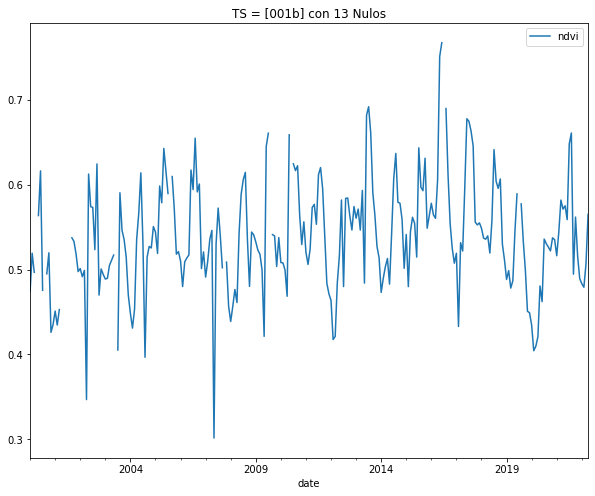

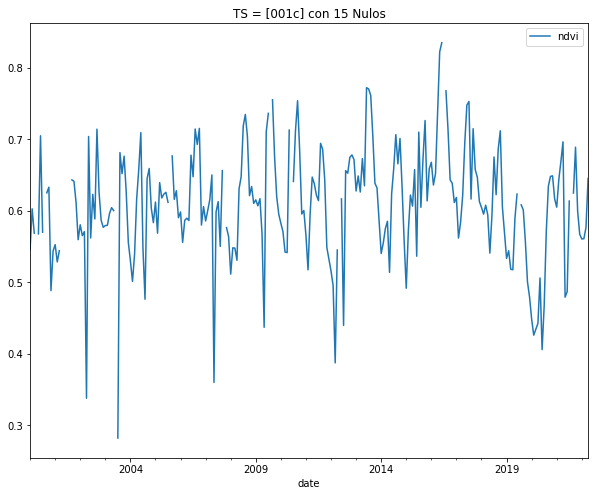

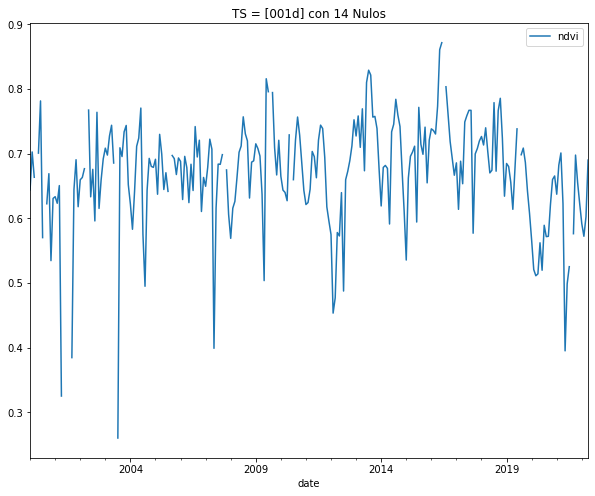

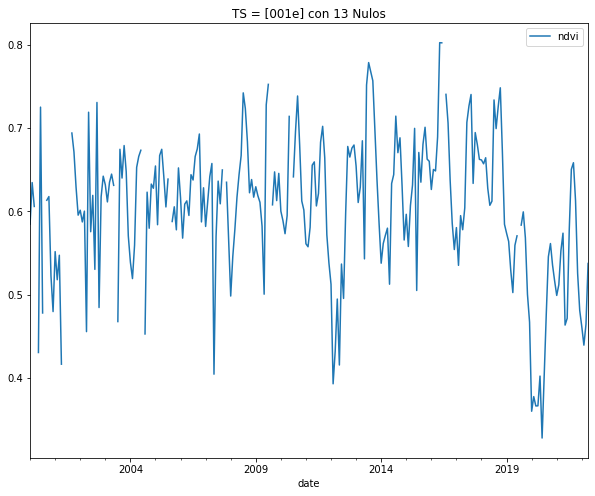

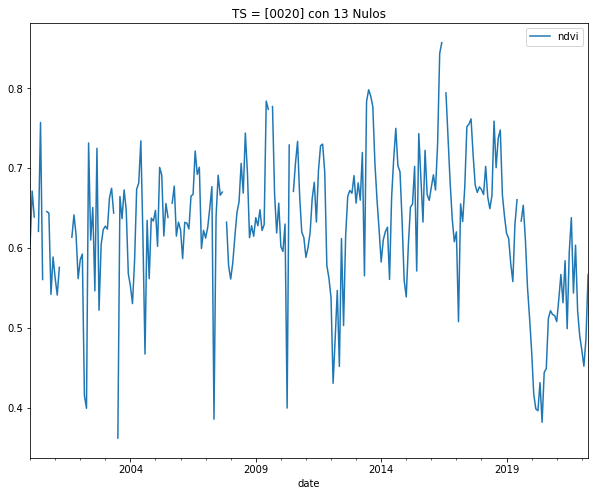

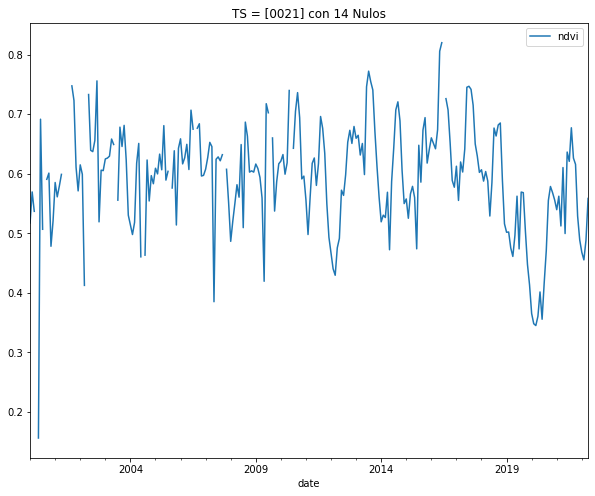

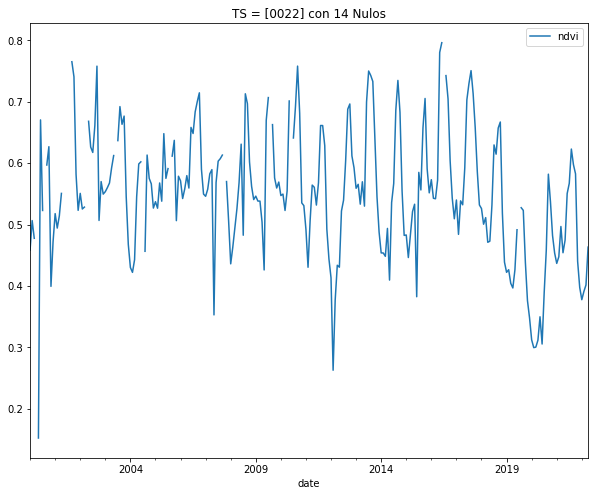

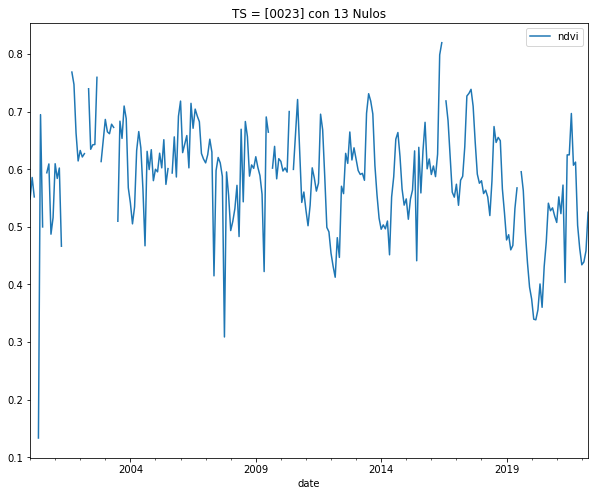

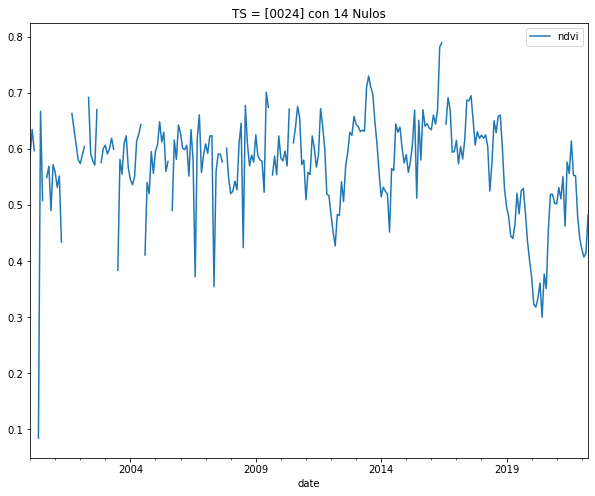

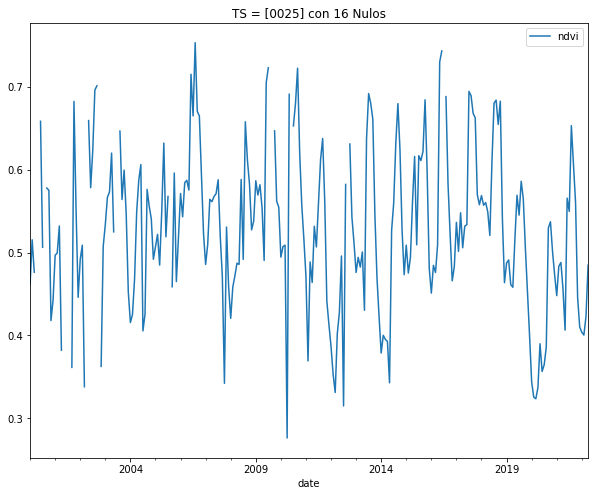

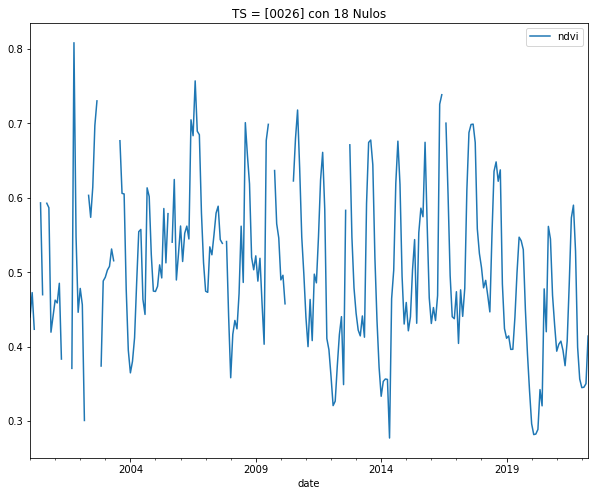

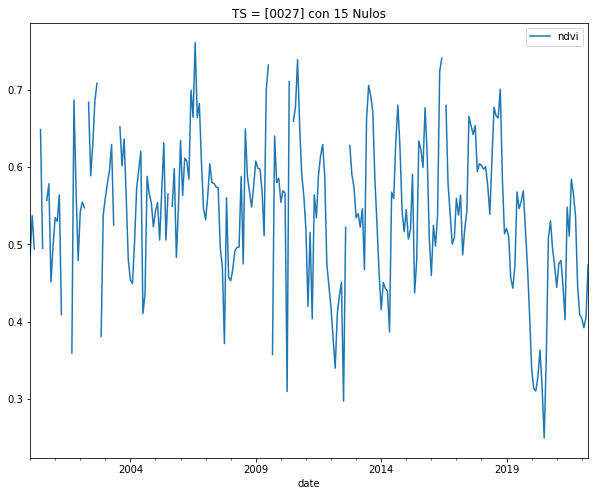

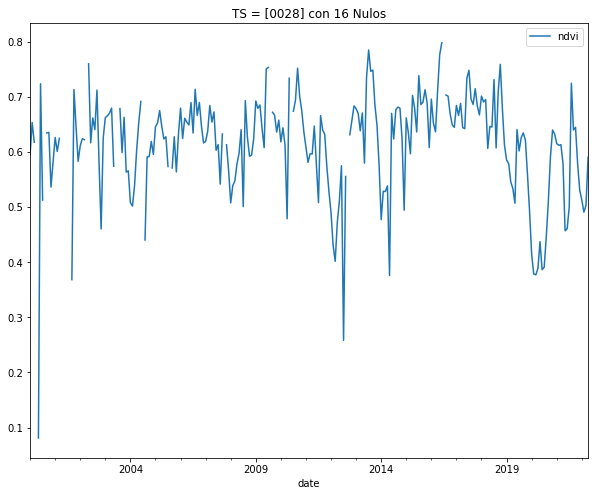

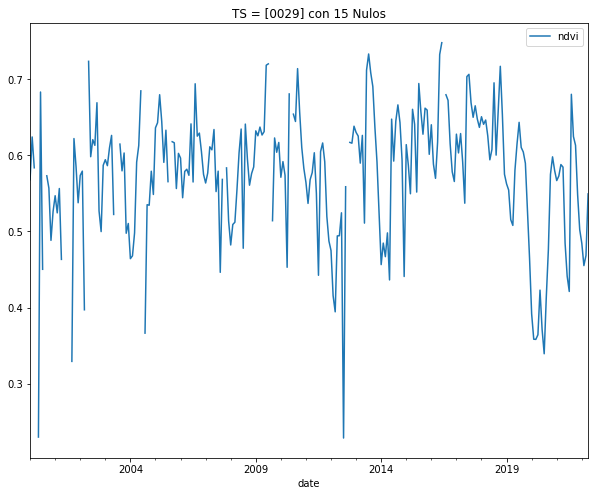

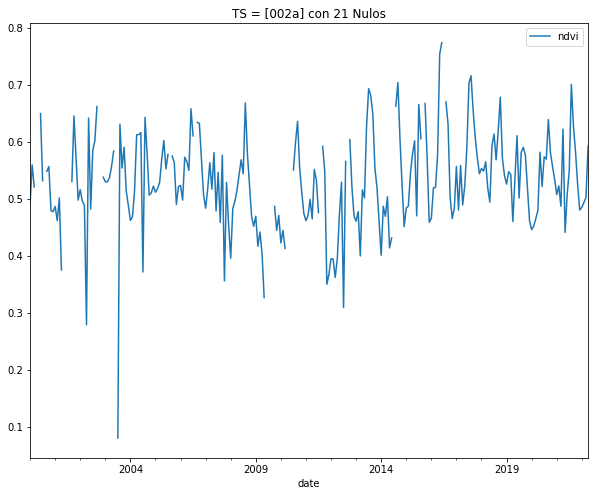

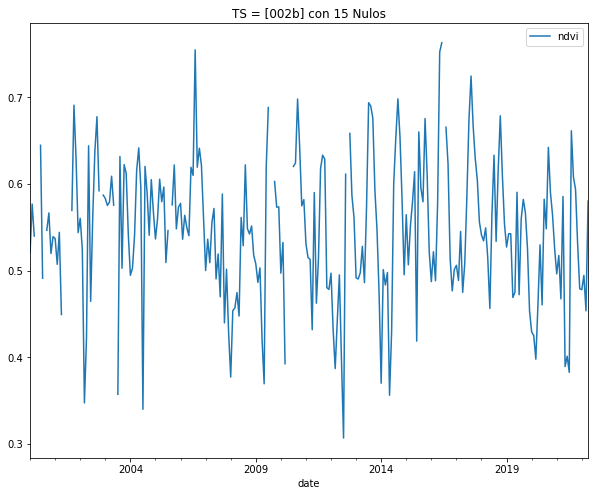

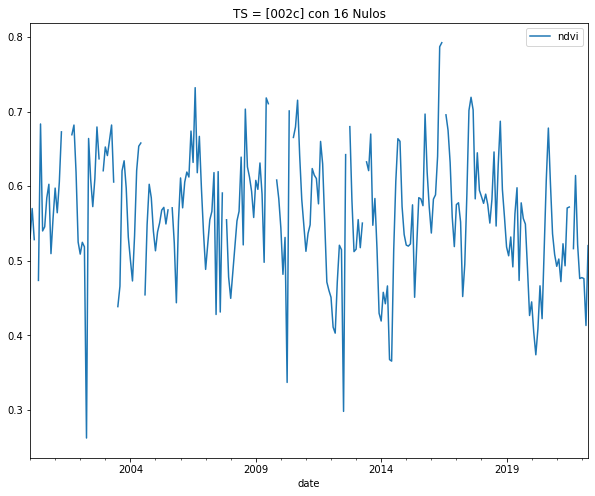

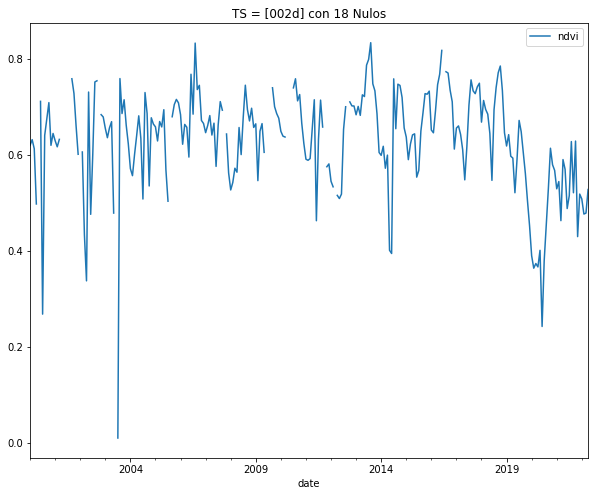

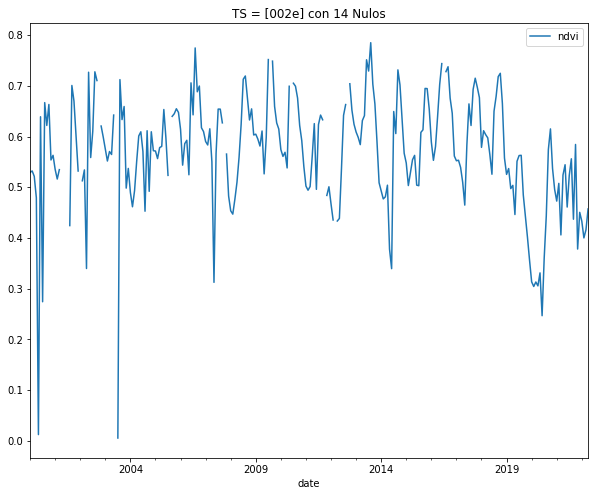

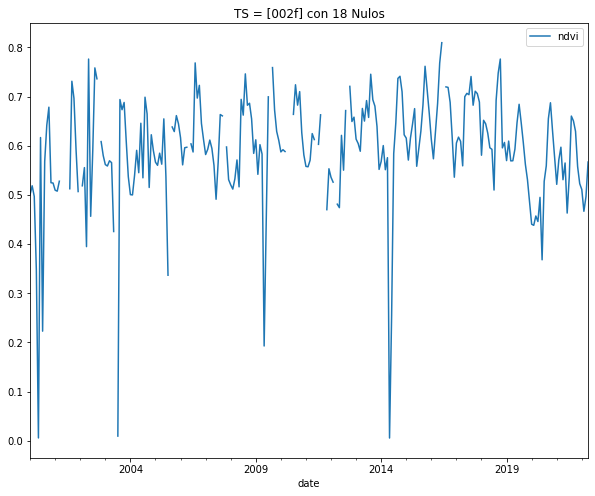

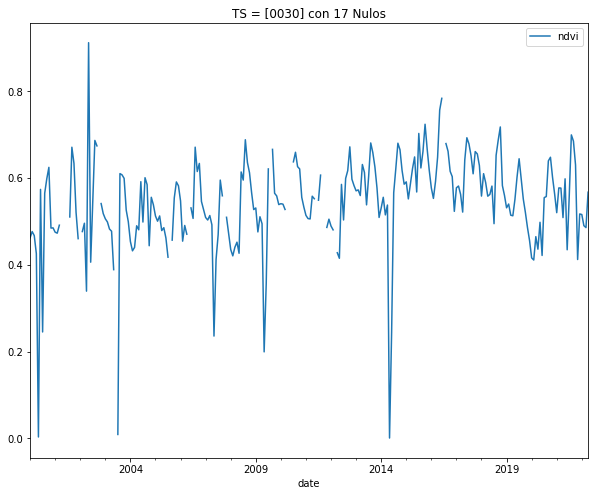

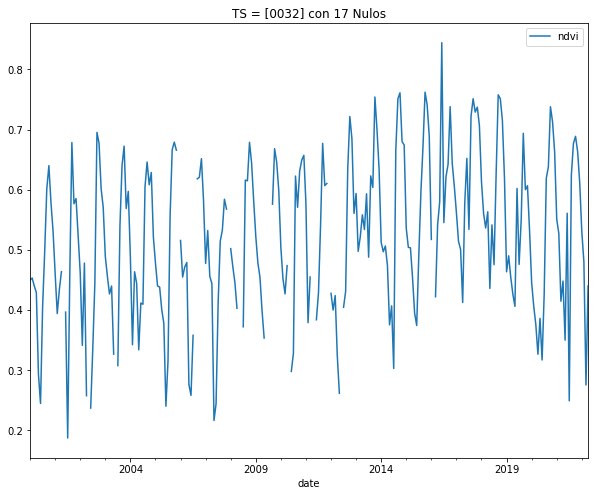

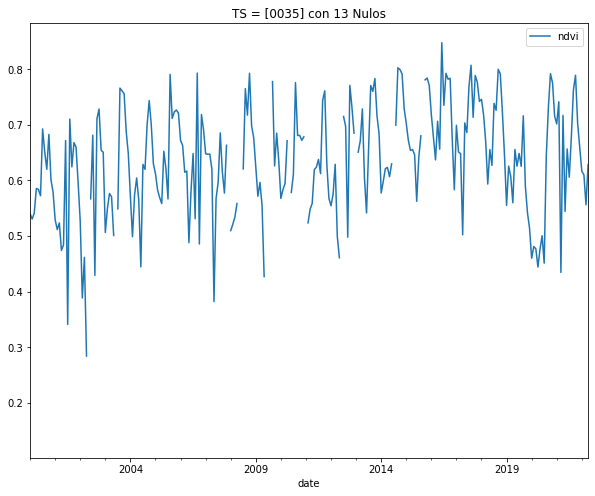

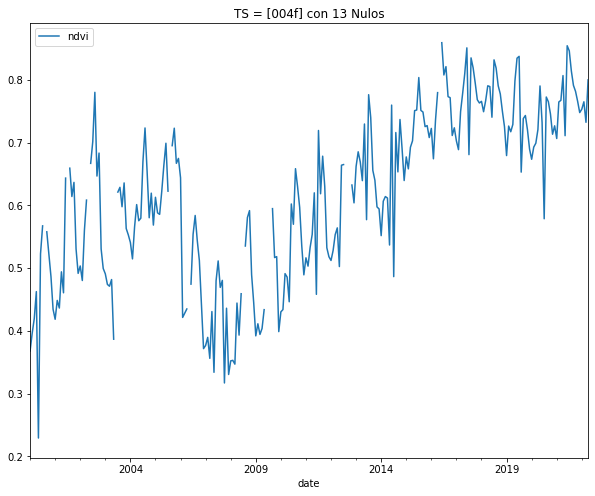

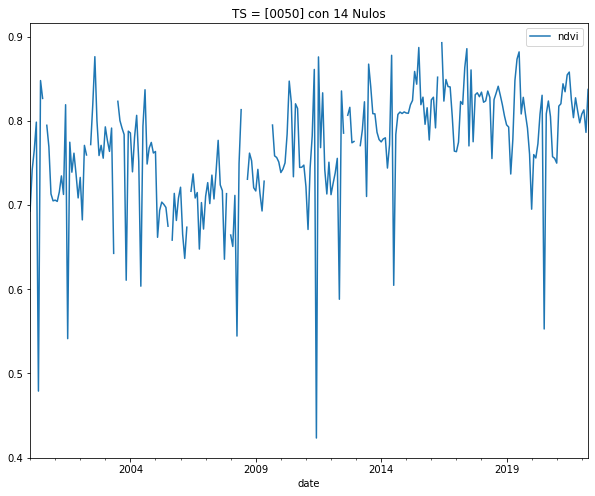

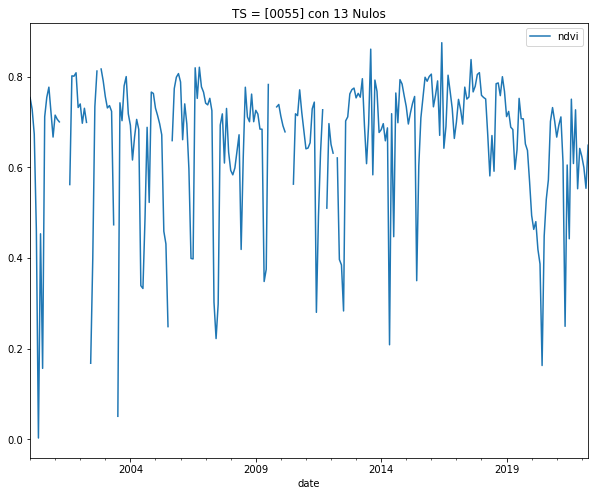

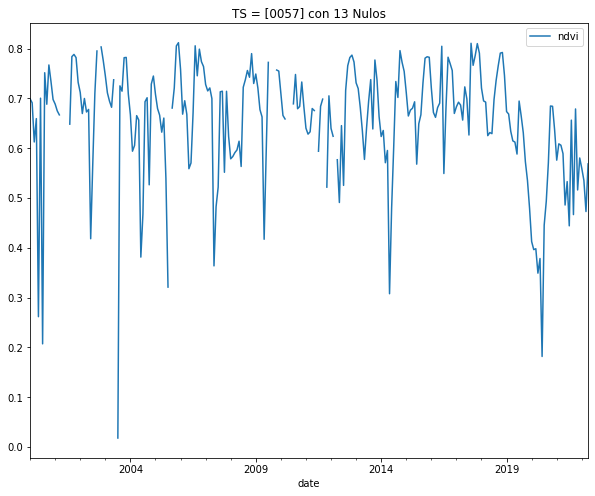

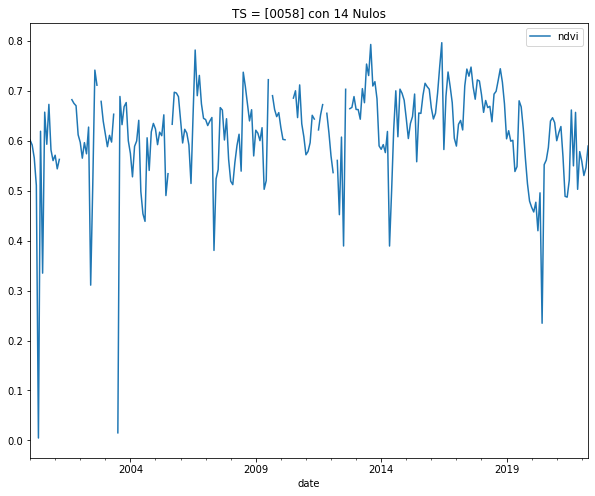

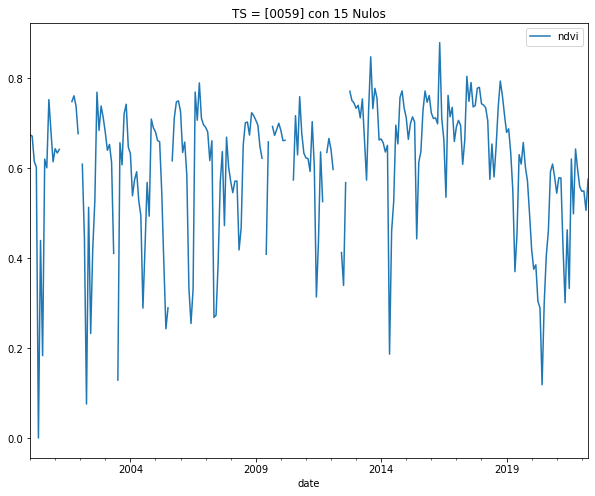

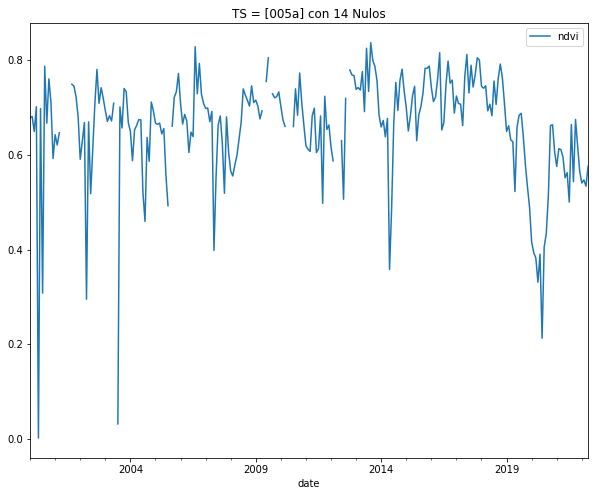

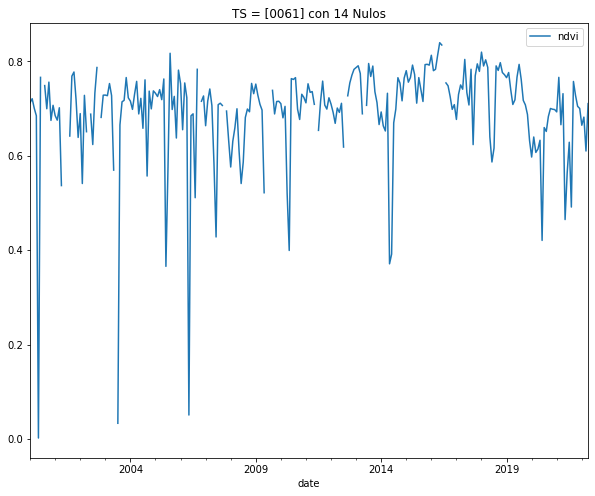

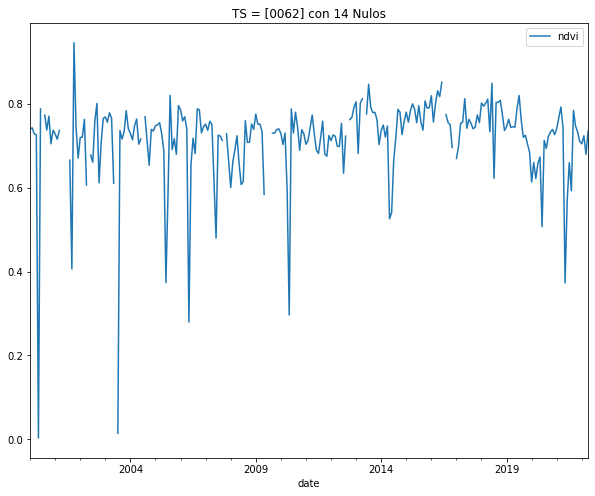

In [21]:
plot_examples(ts_resample_m, threshold = 12)

## Conclusiones

* Se puede ver que originalmente las series de tiempo no son equidistantes, y además tienen una gran cantidad de Nulos.
* Los modelos de serie de tiempo normalmente no funcionan tan bien con grandes cantidades de nulos ni con series no equidistantes.
* Se puede ver que generando resamples de la data es posible reducir el numero de nulos. 
* En este caso la agregación es utilizando media, pero podría pensarse en Mediana o incluso en sólo utilizar un punto cada dos semanas, o de manera mensual.
* Se puede ver que en el caso de reducir el problema a uno mensual se obtienen suficientes puntos por serie de tiempo pero además se baja significativamente el número de nulos los cuales pueden ser facilmente interpolados.